Implement a bag-of-words (BoW) approach for image retrieval. First, extract local features from each image (you can use SIFT or a similar descriptor found in OpenCV library), then generate a codebook via a clustering method (as described <a href="https://en.wikipedia.org/wiki/Bag-of-words_model_in_computer_vision#Codebook_generation">here</a>). The image feature vectors are then histograms of the codewords and can be used for comparison. You do not have to use the entire library to build a dictionary, use just a quater.

In [2]:
# Run this cell to download the data used in this exercise - the image dataset
import zipfile, urllib.request, io
zipfile.ZipFile(io.BytesIO(urllib.request.urlopen("http://data.vicos.si/lukacu/multimedia/exercise5.zip").read())).extractall()

In [57]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Make a list of folders
root_folder = "images"
folders = [f for f in os.listdir(root_folder) if os.path.isdir(os.path.join(root_folder, f))]

# Make a list of path + file name
images = []
for folder in folders:
    file_path = root_folder + "/" + folder
    images_in_folder = [root_folder + "/" + folder + "/" + f for f in os.listdir(os.path.join(root_folder, folder)) if f.endswith('.jpg') or f.endswith('.png') or f.endswith('.jpeg')]
    images.append(images_in_folder)

dict_histograms = dict()

for folder in images:
    i = 0
    for image in folder:
        # Take just 25 images from each folder
        if i >= 25:
            break
        else:
            # print(image)
            # Load the image, convert it to grayscale
            img = cv2.imread(image)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Detect SIFT keypoints and extract descriptors
            sift = cv2.xfeatures2d.SIFT_create()
            kp, des = sift.detectAndCompute(gray, None)

            # Use only 1/4 of the descriptors for the codebook generation 
            des = des[:len(des)//4]

            # Izpis shape: value a je n_samples in n_samples >= n_clusters
            #(a, b) = des.shape
            #print(a, b)

            # Perform k-means clustering
            k = 5 # number of clusters
            kmeans = KMeans(n_clusters=k, n_init="auto")
            kmeans.fit(des.astype(np.float64))

            # Get the codewords
            codewords = kmeans.cluster_centers_

            # Compute the histogram of codewords for the image
            histogram = np.zeros(k)
            for d in des:
                h = np.array(list(map(lambda x: x.astype('double'), d)))
                h = h.reshape(1, len(d))
                codeword = kmeans.predict(h)
                histogram[codeword] += 1

            # Normalize the histogram
            histogram /= sum(histogram)
            dict_histograms[image] = histogram
        i += 1

print("konec")

konec


2075


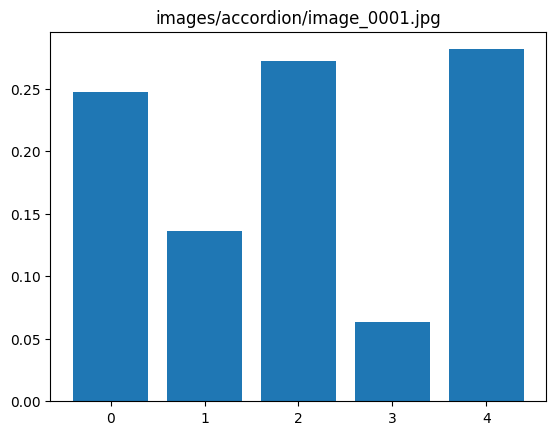

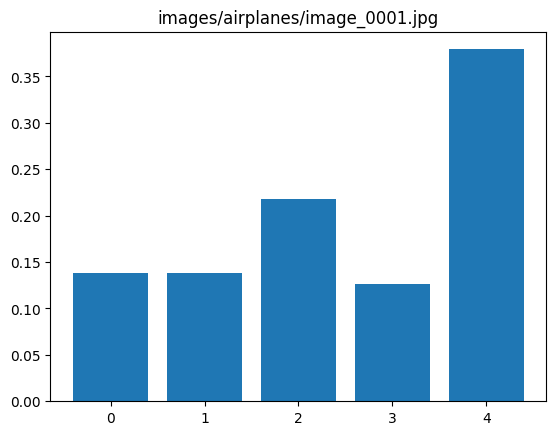

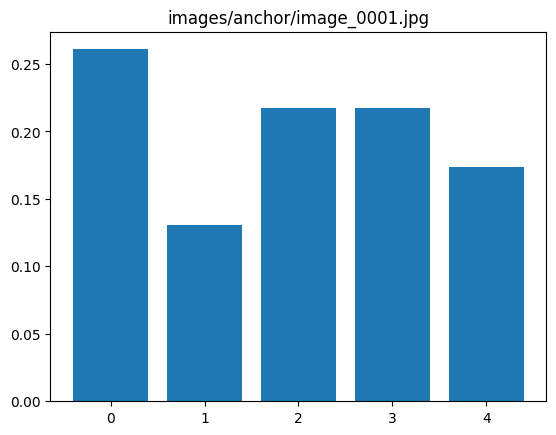

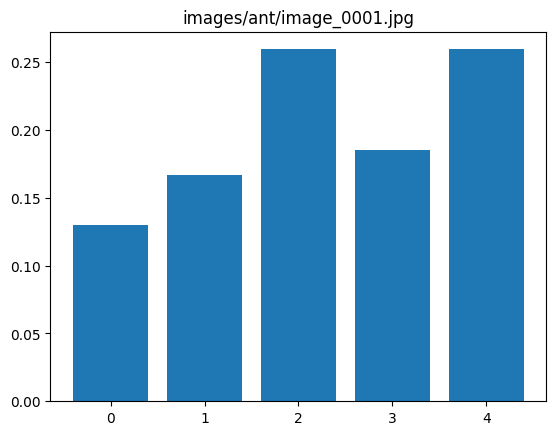

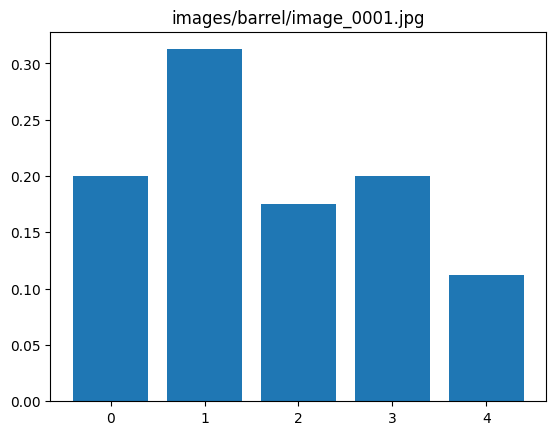

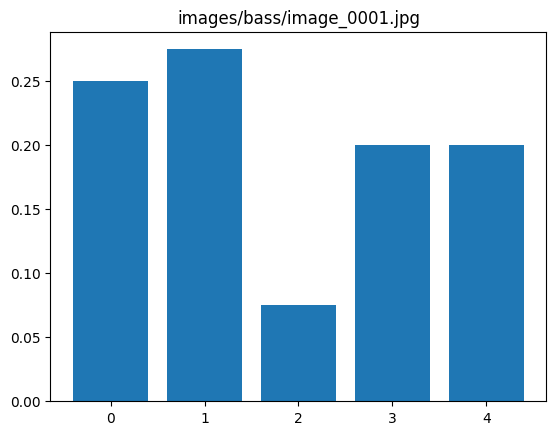

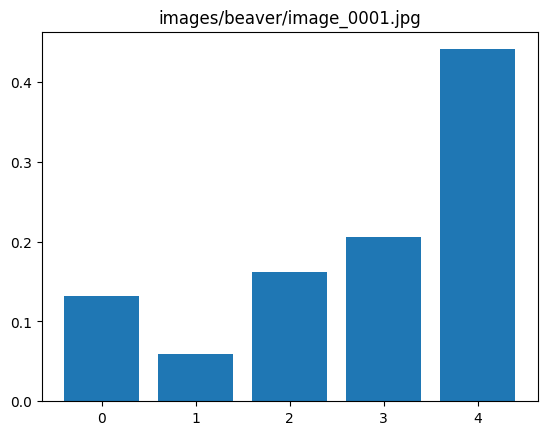

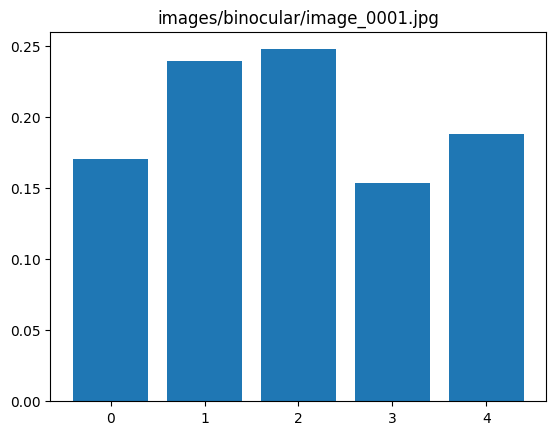

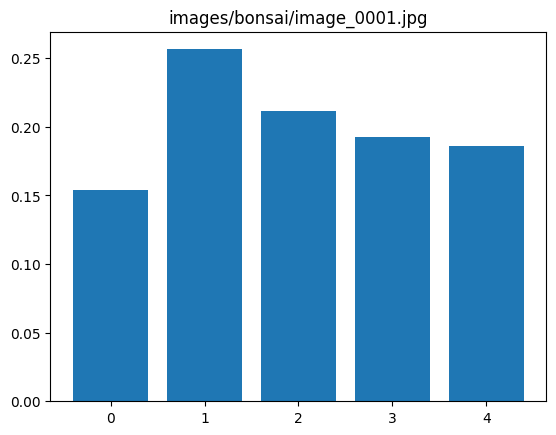

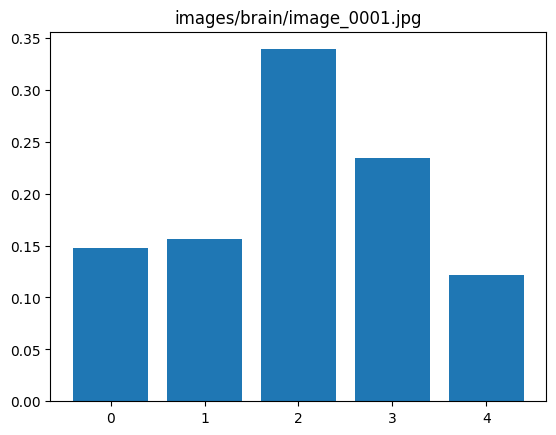

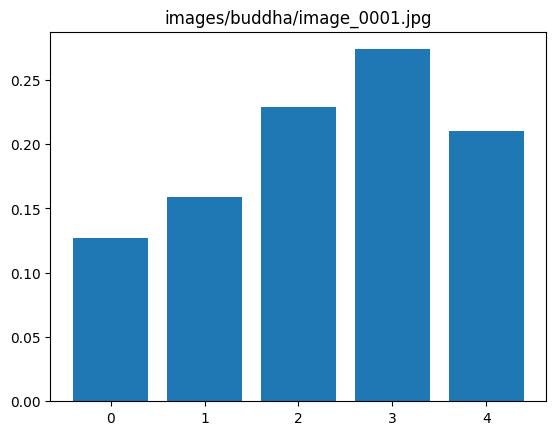

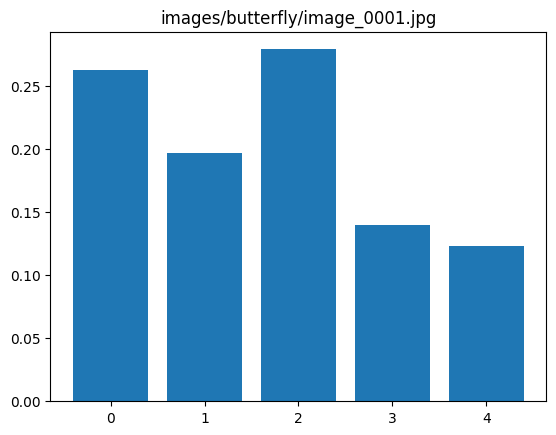

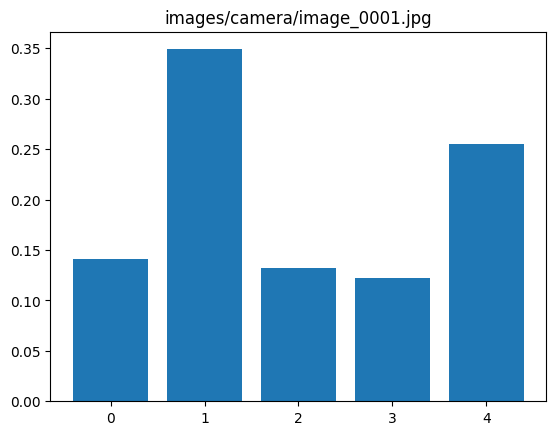

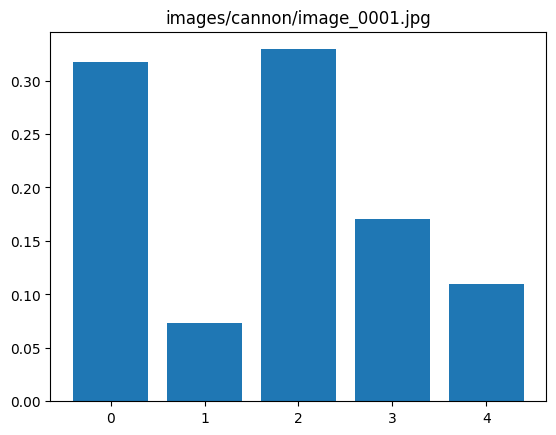

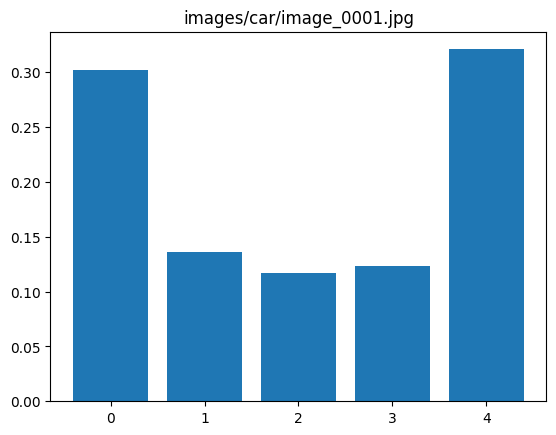

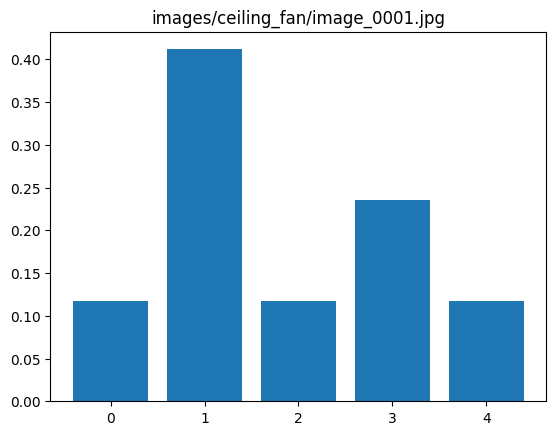

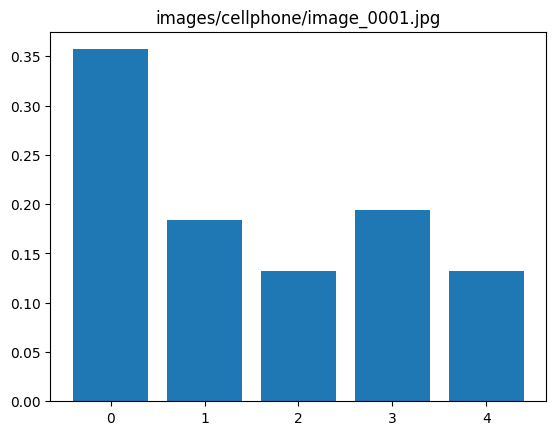

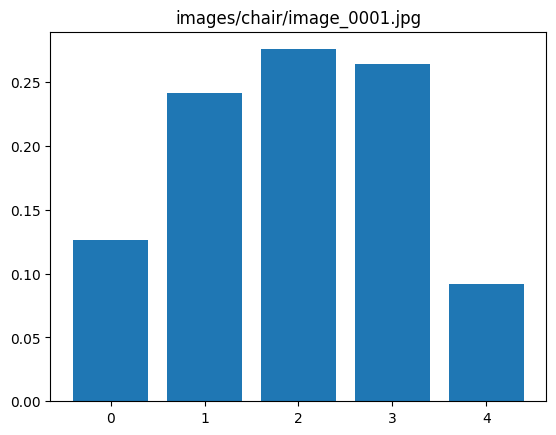

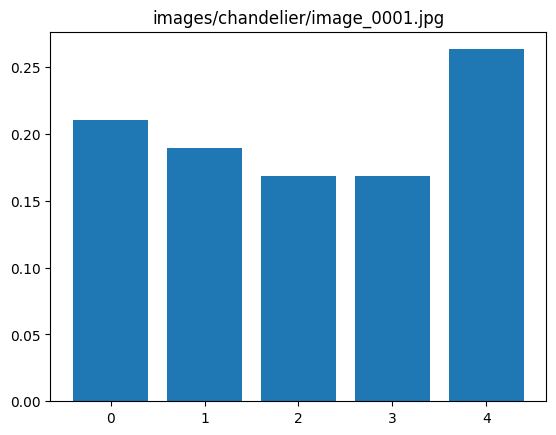

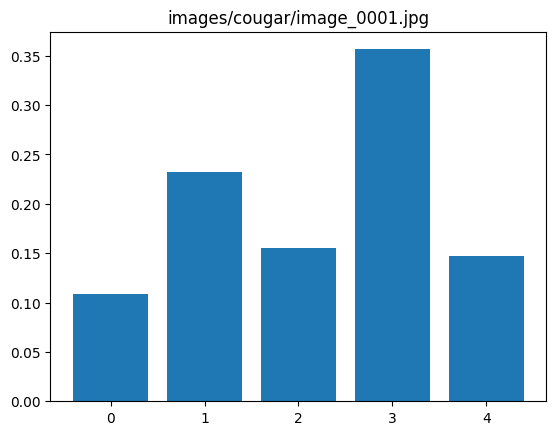

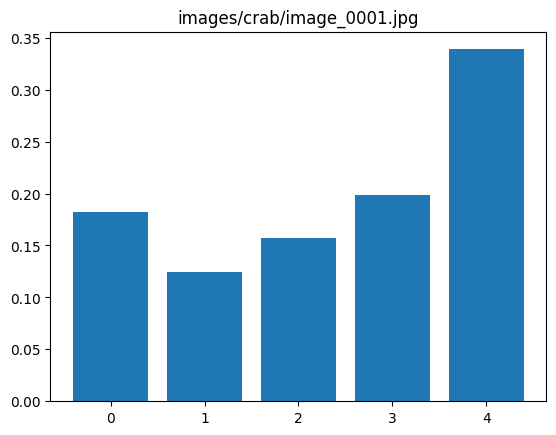

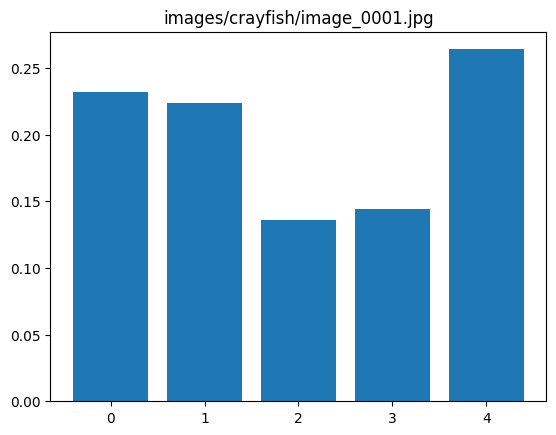

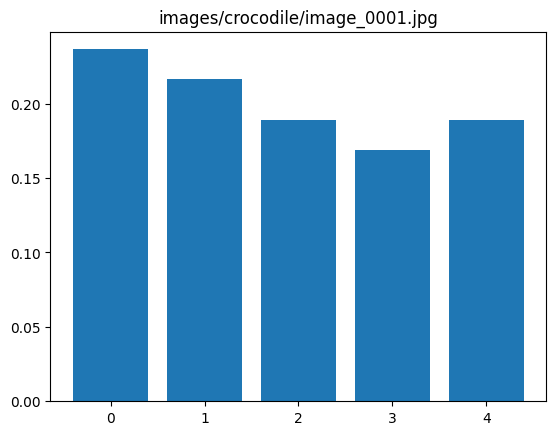

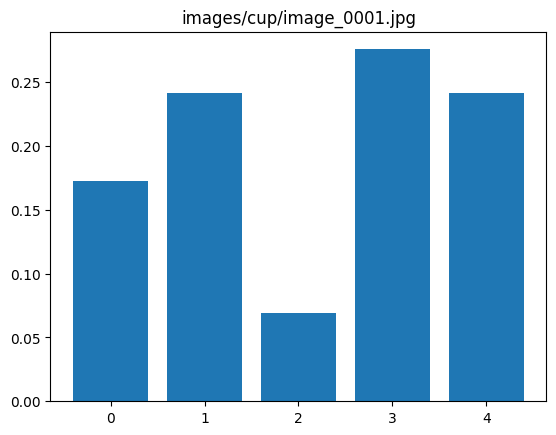

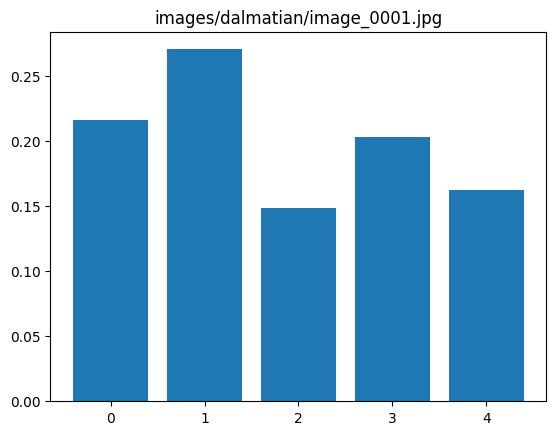

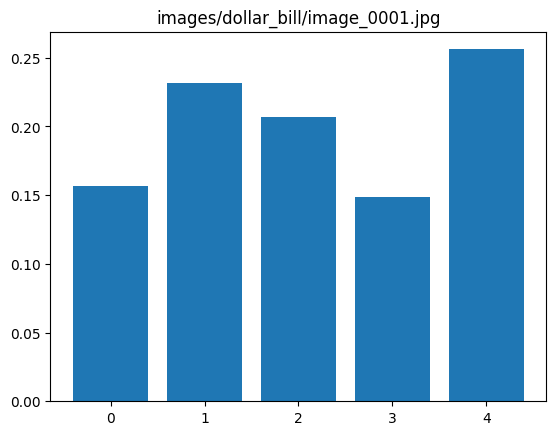

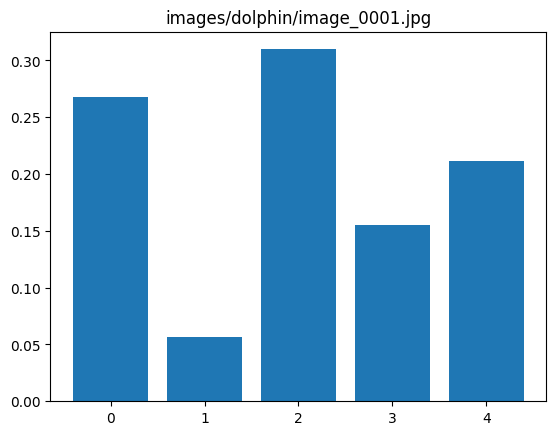

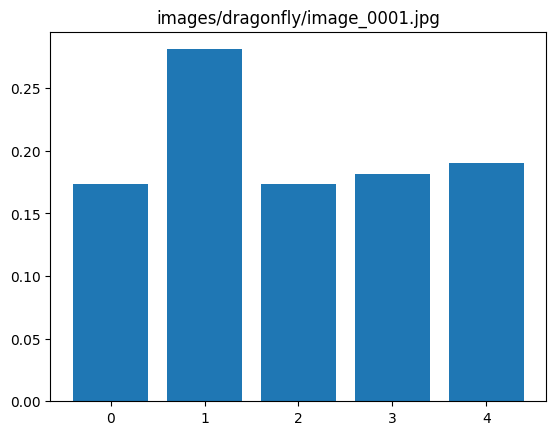

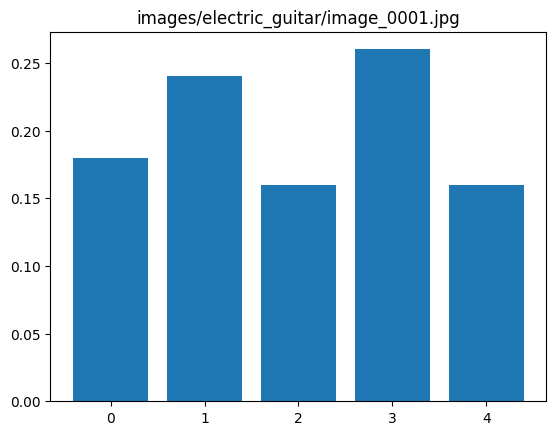

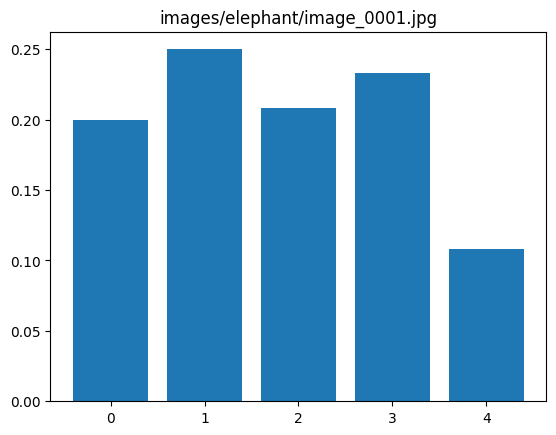

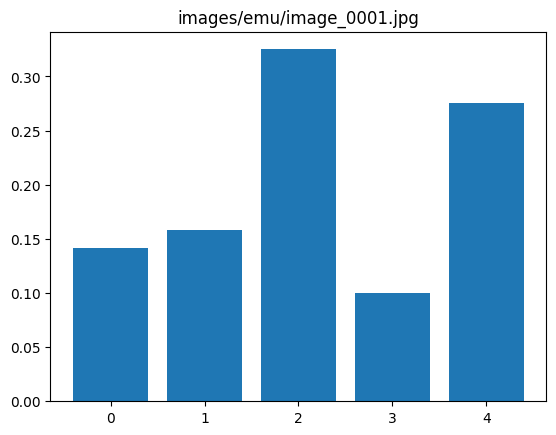

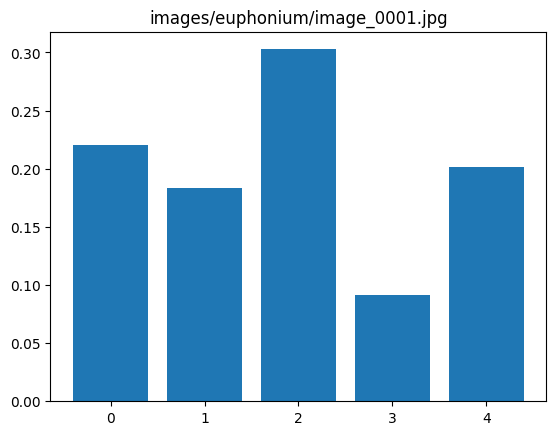

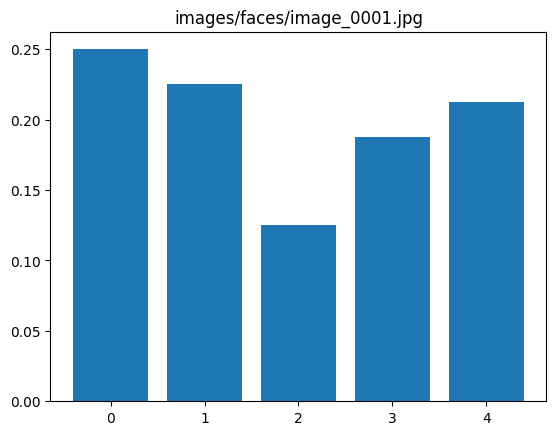

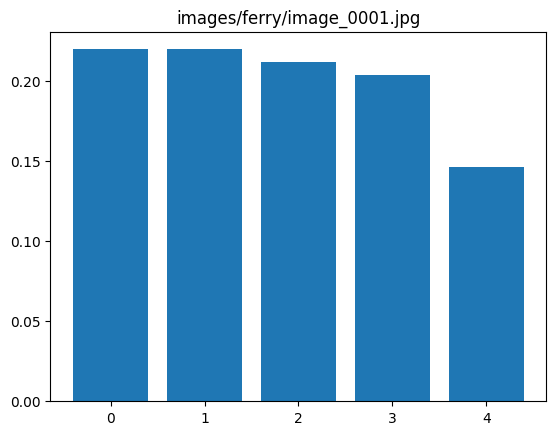

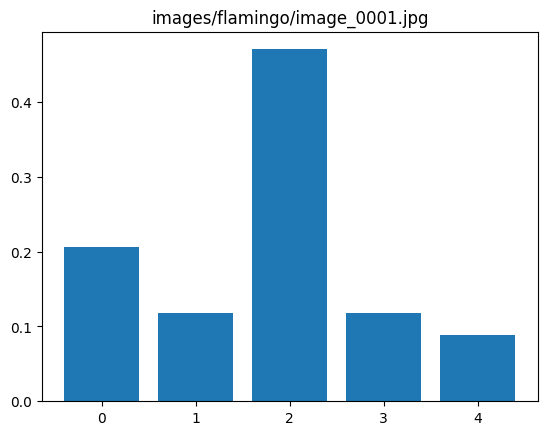

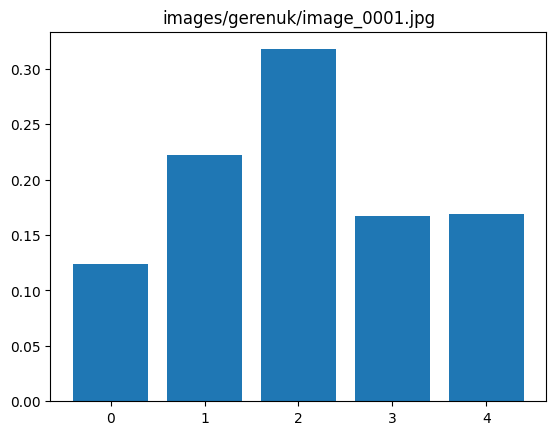

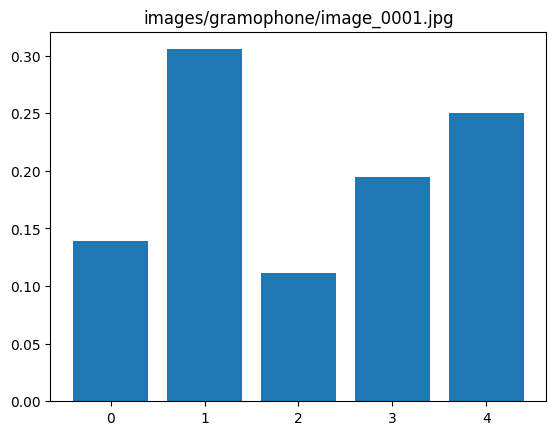

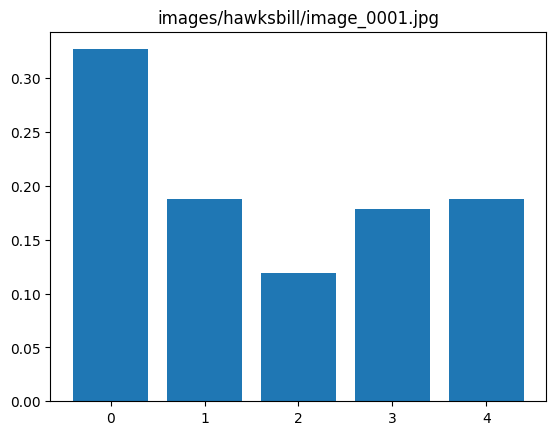

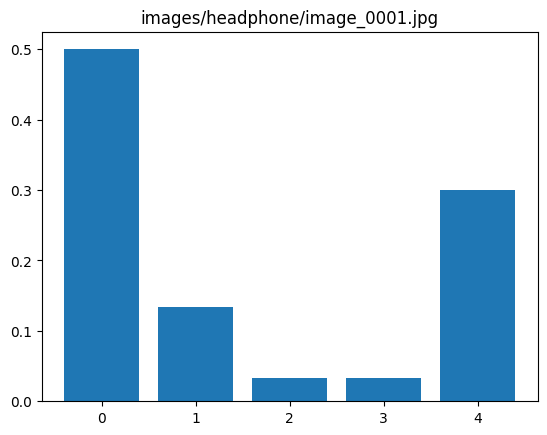

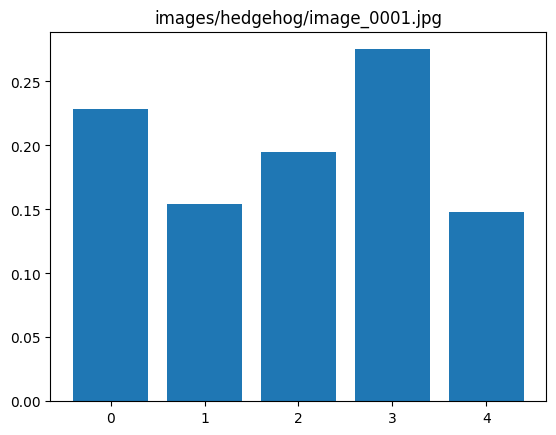

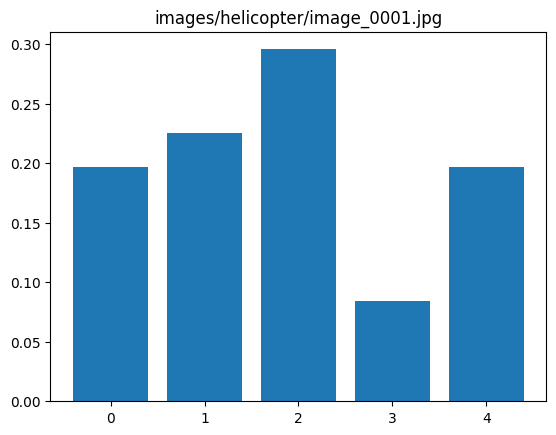

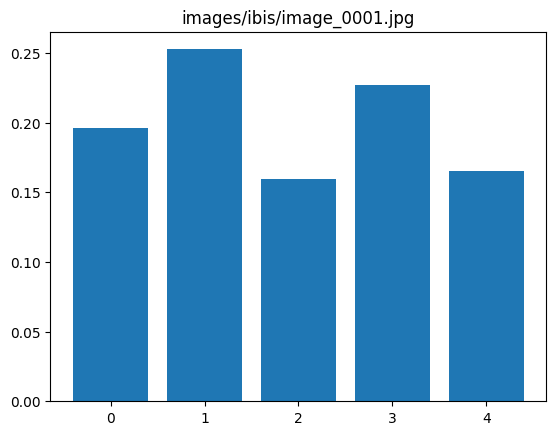

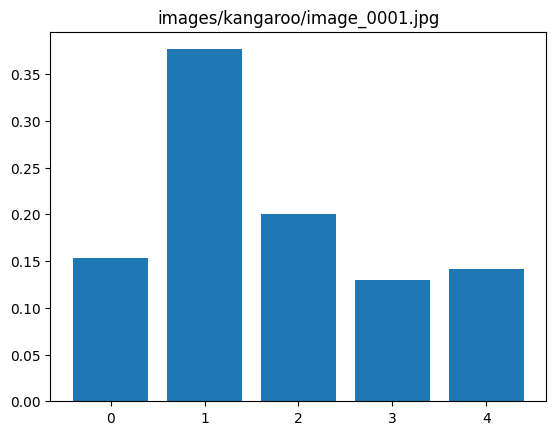

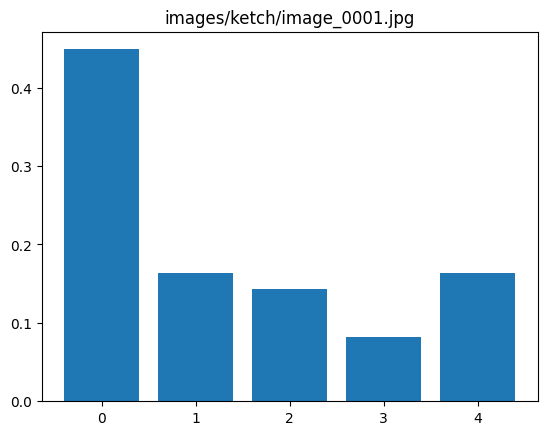

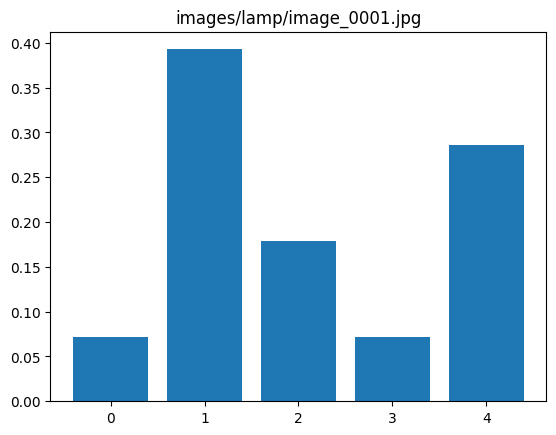

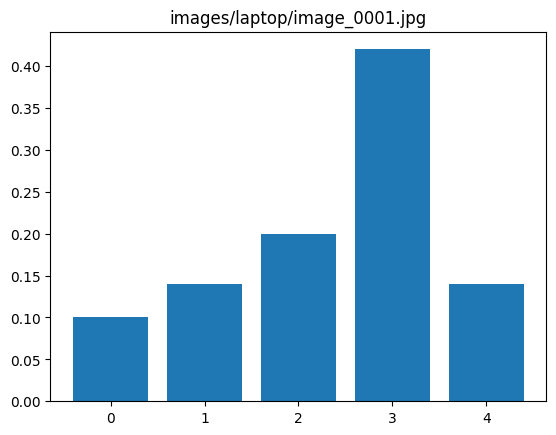

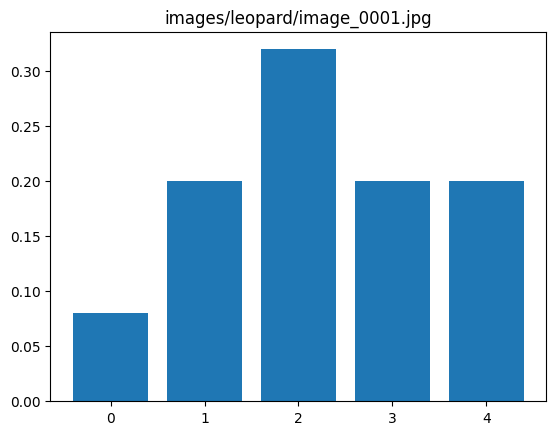

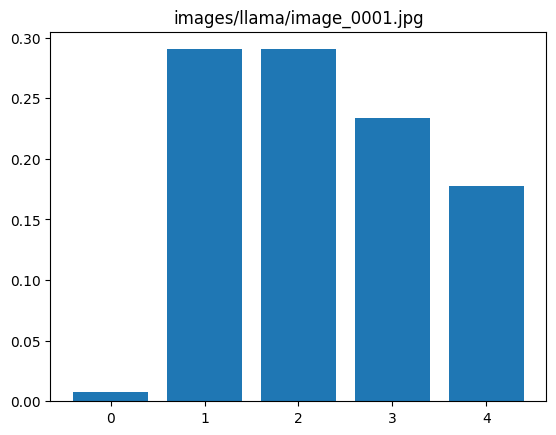

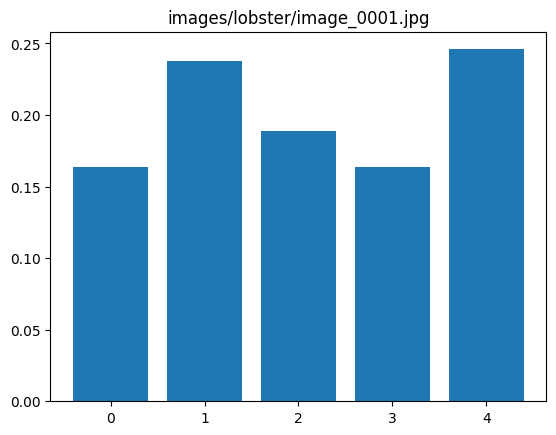

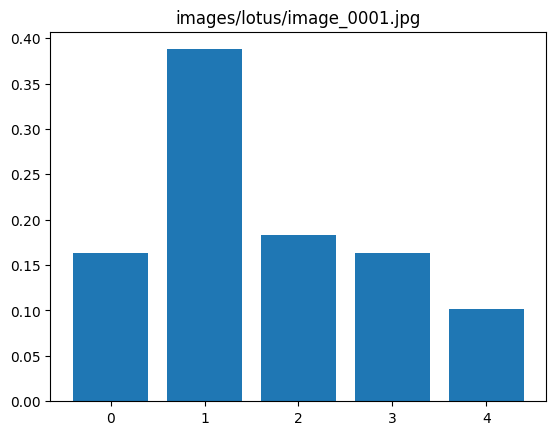

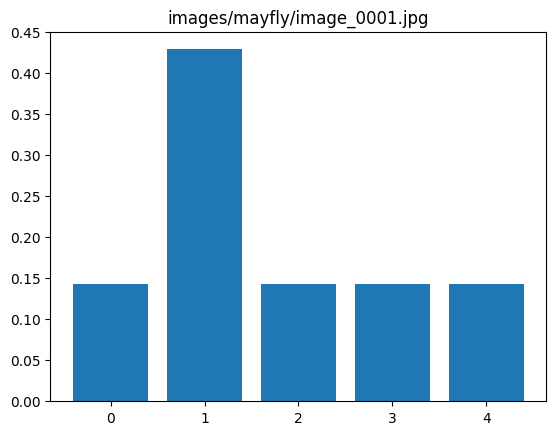

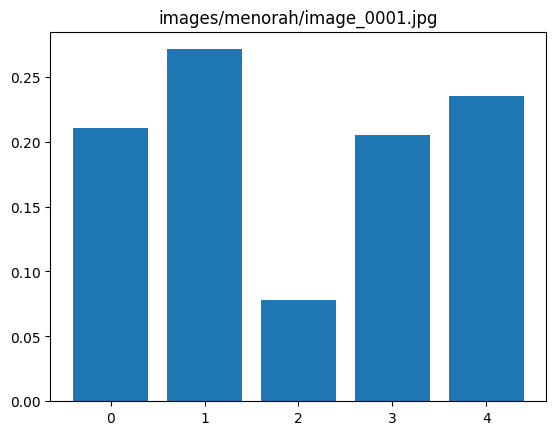

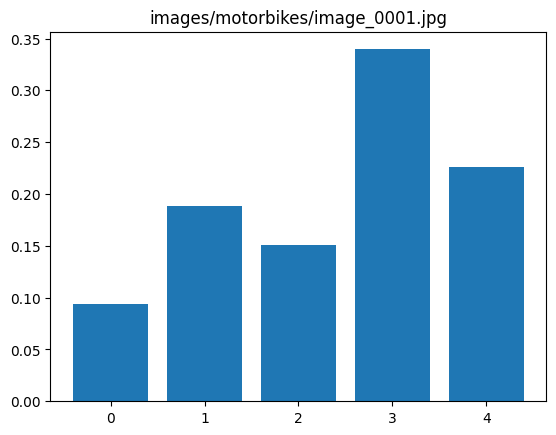

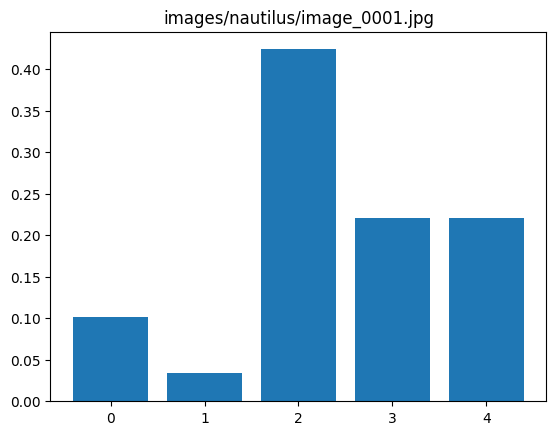

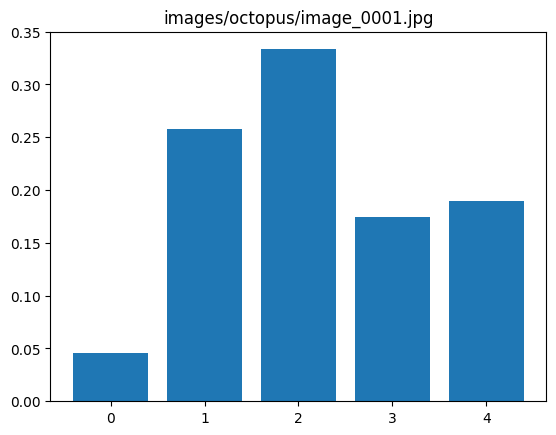

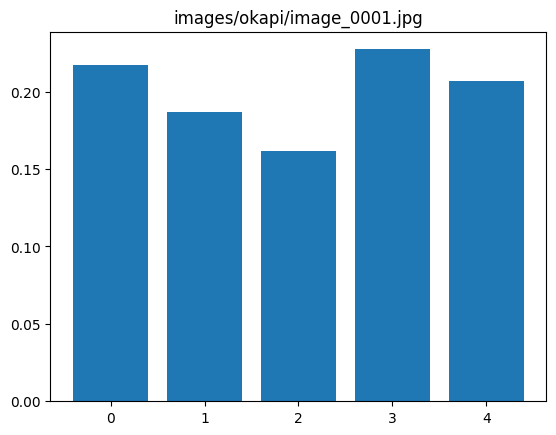

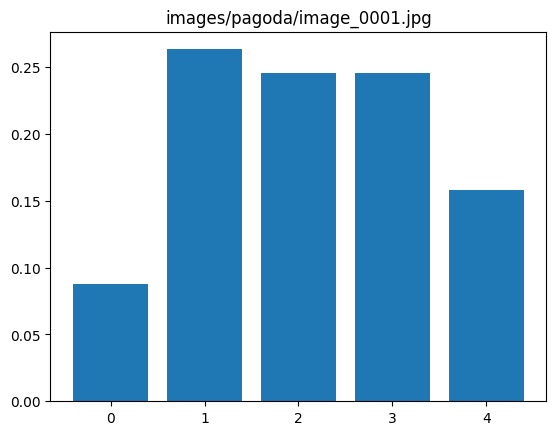

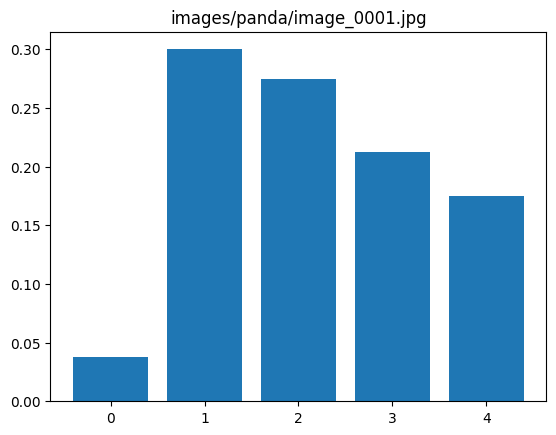

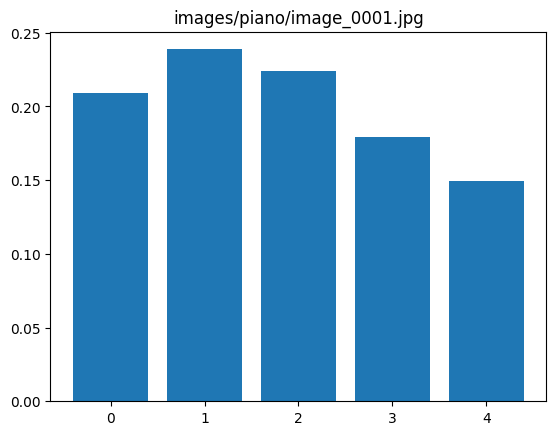

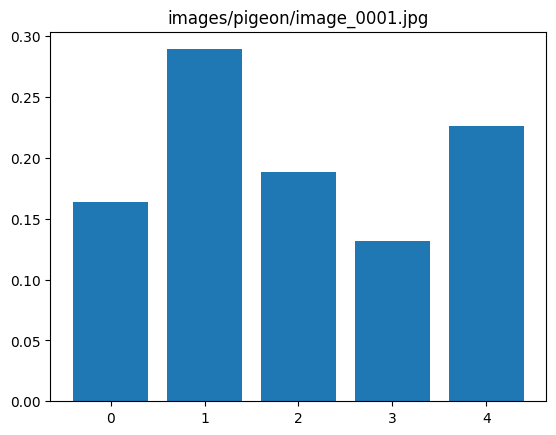

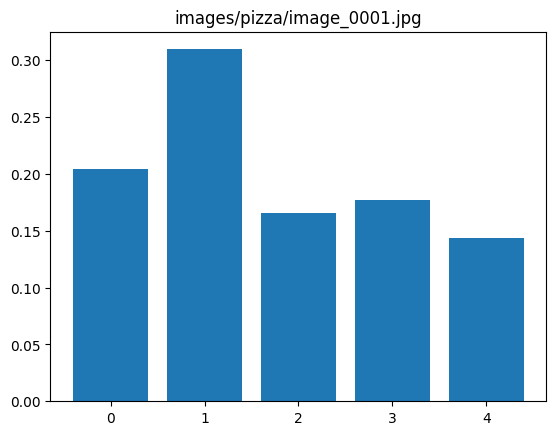

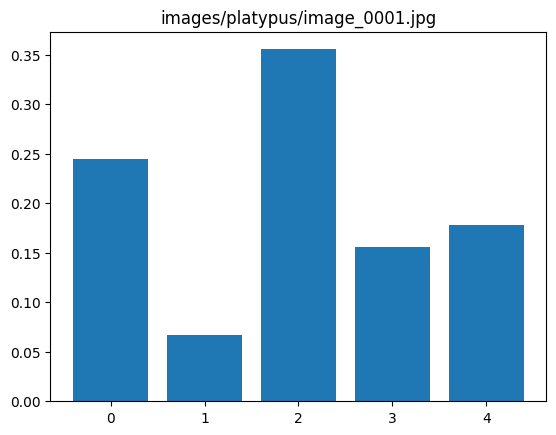

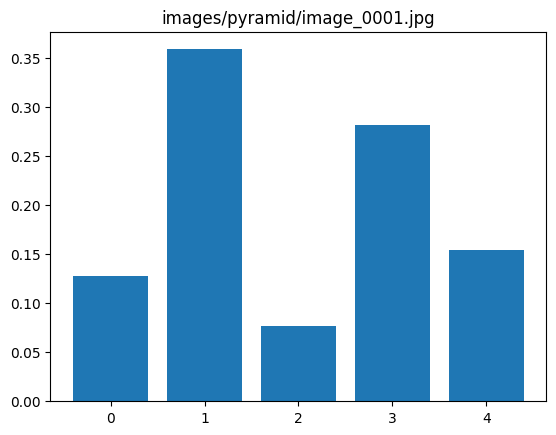

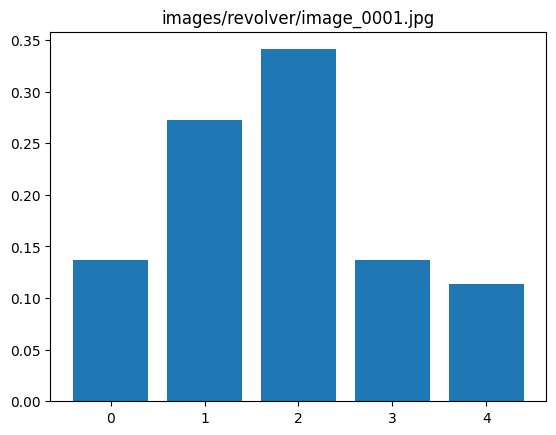

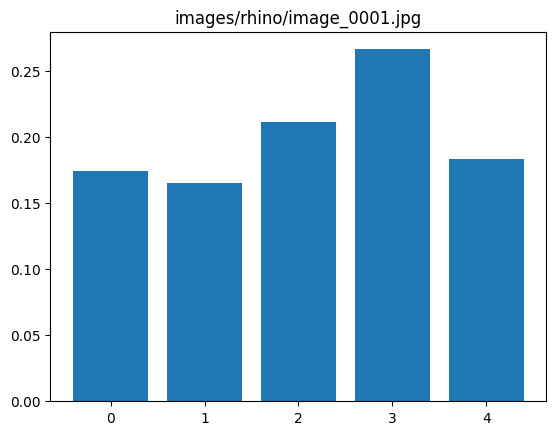

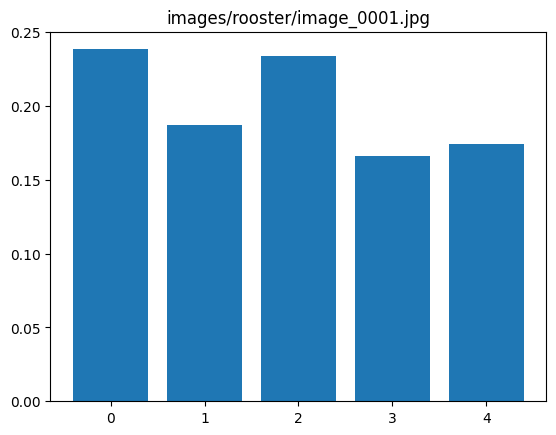

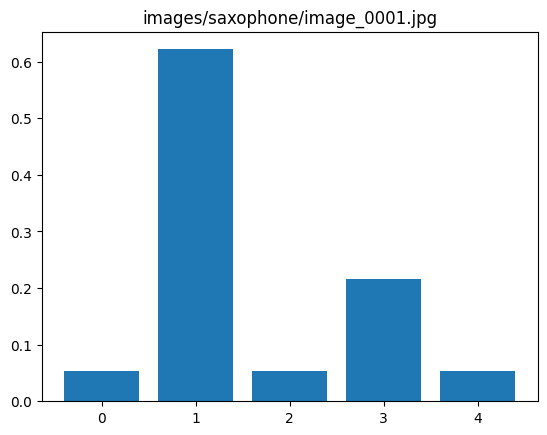

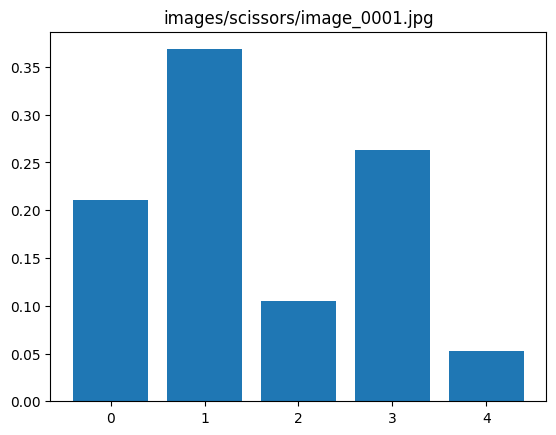

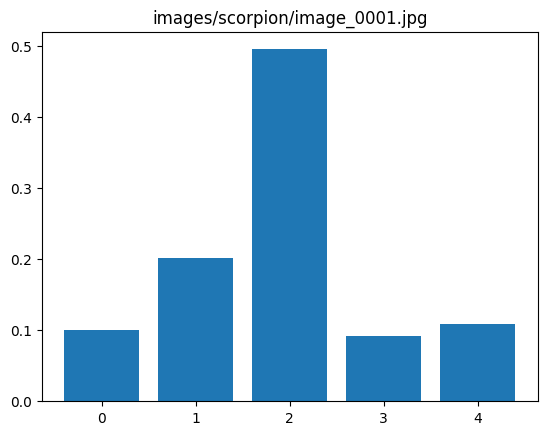

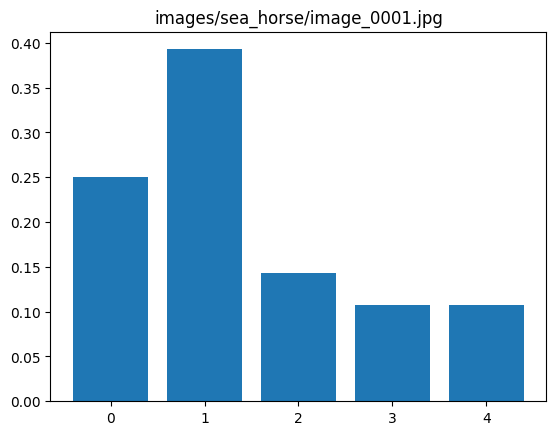

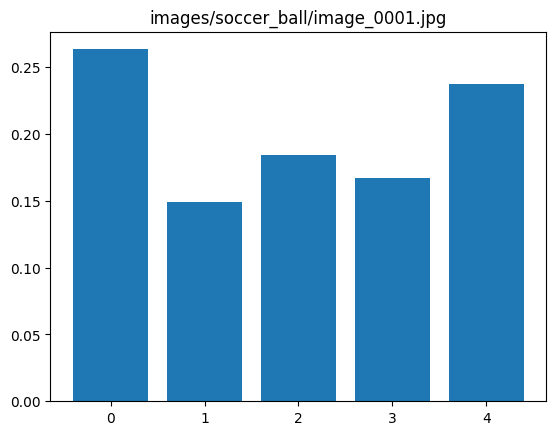

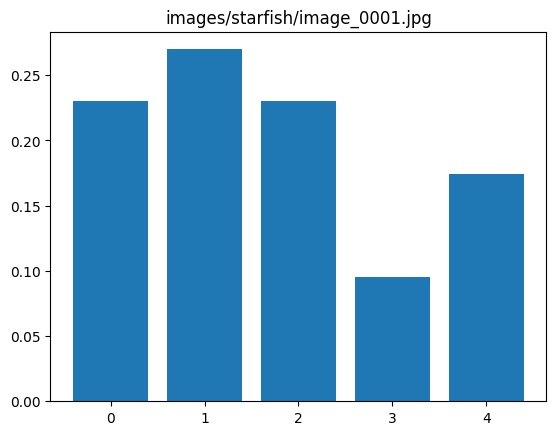

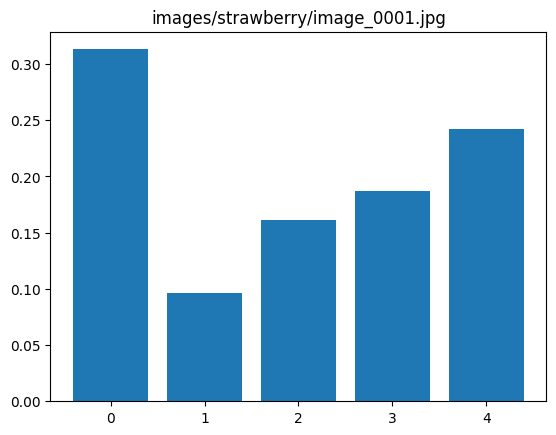

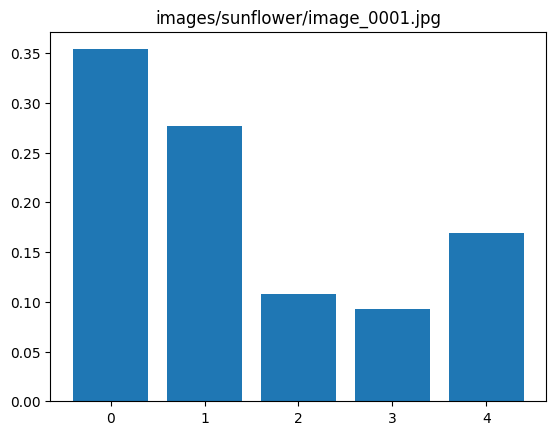

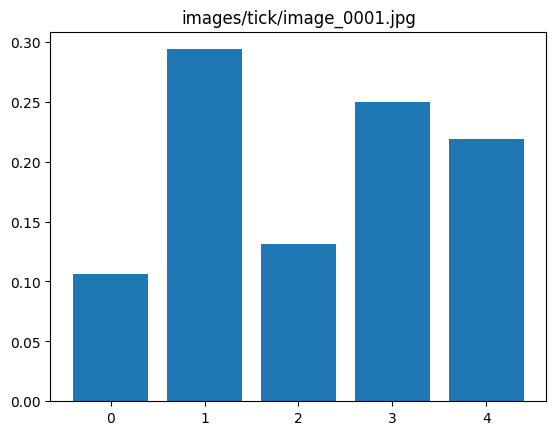

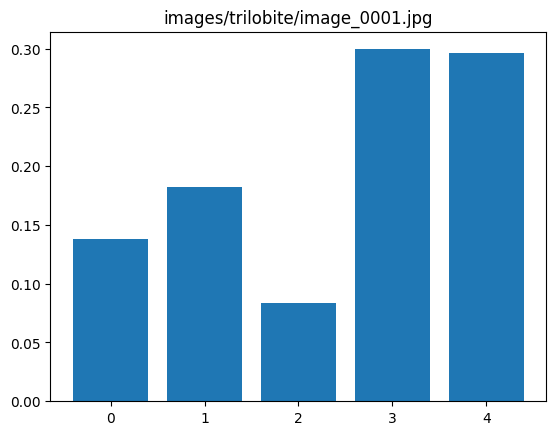

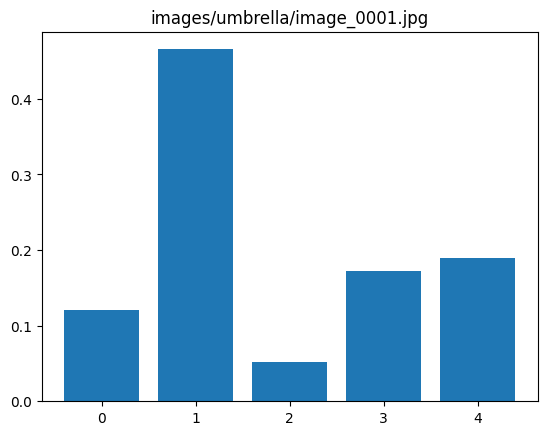

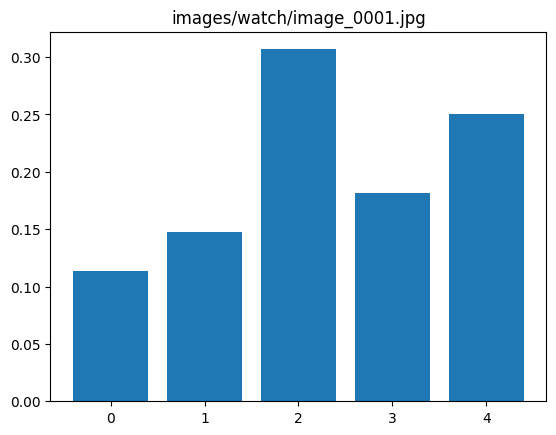

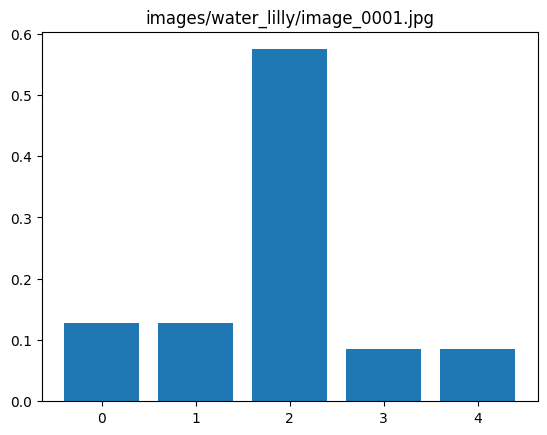

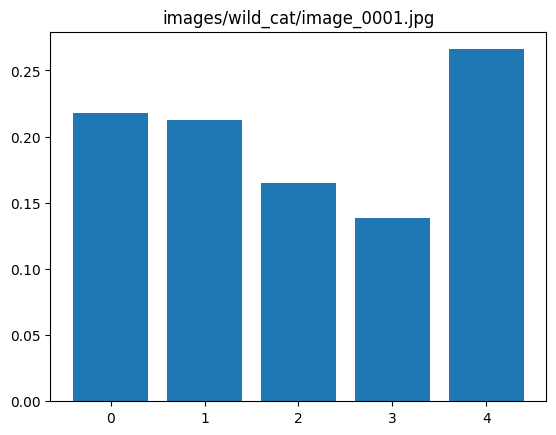

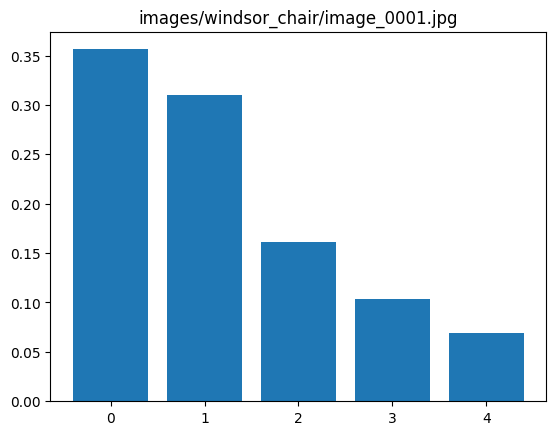

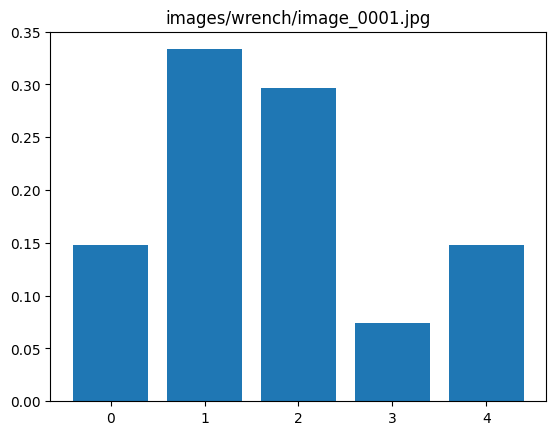

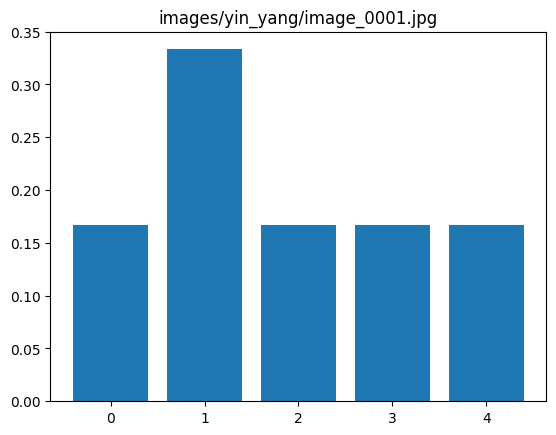

In [59]:
# Poizvedbe po dictionary-ju in risanje histogramov

print(len(dict_histograms))

for i, image in enumerate(dict_histograms):
    # Print just the fisrt histogram of image from every folder
    if i % 25 != 0:
        pass
    else:
        #Plot the histogram
        histogram = dict_histograms[image]
        plt.bar(range(len(histogram)), histogram)
        plt.title(image)

        # Show the plot
        plt.show()

In [79]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Make a list of folders
root_folder = "images"
folders = [f for f in os.listdir(root_folder) if os.path.isdir(os.path.join(root_folder, f))]

# Make a list of path + file name
images = []
for folder in folders:
    file_path = root_folder + "/" + folder
    images_in_folder = [root_folder + "/" + folder + "/" + f for f in os.listdir(os.path.join(root_folder, folder)) if f.endswith('.jpg') or f.endswith('.png') or f.endswith('.jpeg')]
    images.append(images_in_folder)

dict_histograms_2 = dict()
min_a = 1000000

for folder in images:
    i = 0
    for image in folder:
        # Take just 25 images from each folder
        if i >= 5:
            break
        else:
            # print(image)
            # Load the image, convert it to grayscale
            img = cv2.imread(image)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Detect SIFT keypoints and extract descriptors
            sift = cv2.xfeatures2d.SIFT_create()
            kp, des = sift.detectAndCompute(gray, None)

            # Use only 1/4 of the descriptors for the codebook generation 
            des = des[:len(des)//4]

            # Izpis shape: value a je n_samples in n_samples >= n_clusters
            (a, b) = des.shape
            # print(a, b)
            if a <= 30:
                i -= 1
                break

            # Perform k-means clustering
            k = 30 # number of clusters
            kmeans = KMeans(n_clusters=k, n_init="auto")
            kmeans.fit(des.astype(np.float64))

            # Get the codewords
            codewords = kmeans.cluster_centers_

            # Compute the histogram of codewords for the image
            histogram = np.zeros(k)
            for d in des:
                h = np.array(list(map(lambda x: x.astype('double'), d)))
                h = h.reshape(1, len(d))
                codeword = kmeans.predict(h)
                histogram[codeword] += 1

            # Normalize the histogram
            histogram /= sum(histogram)
            dict_histograms_2[image] = histogram
        i += 1

print("konec")

konec


336


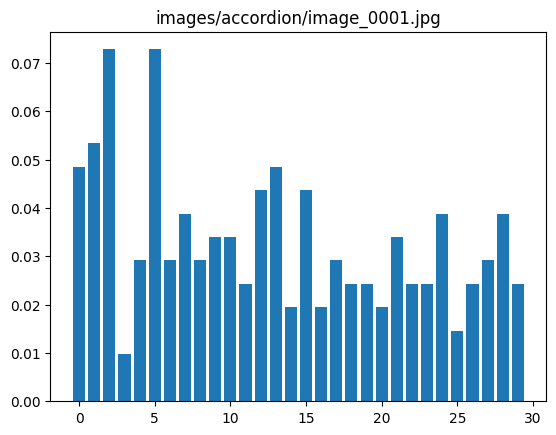

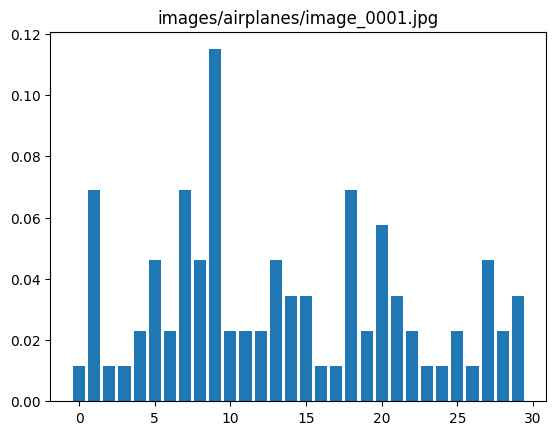

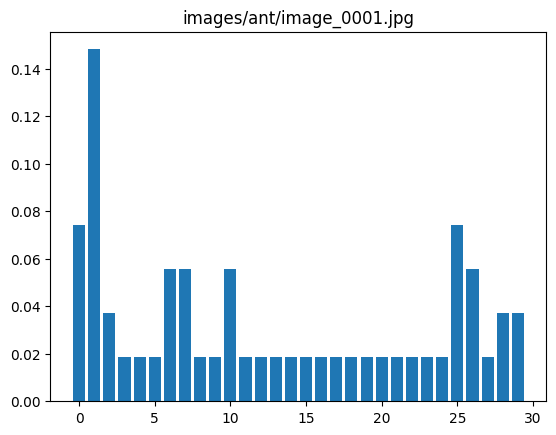

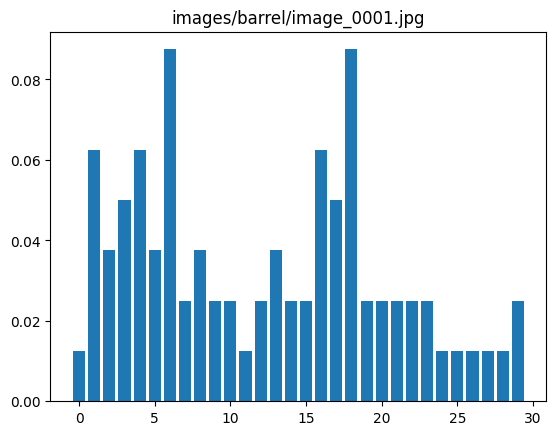

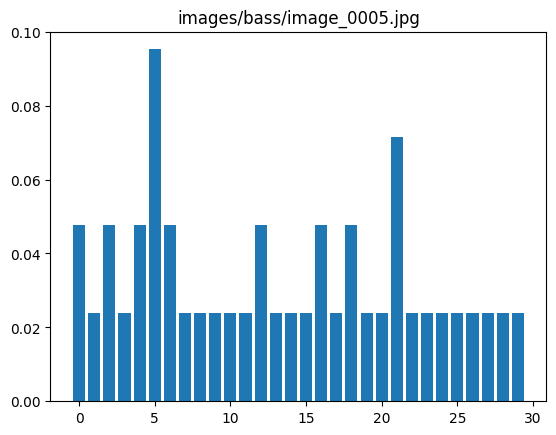

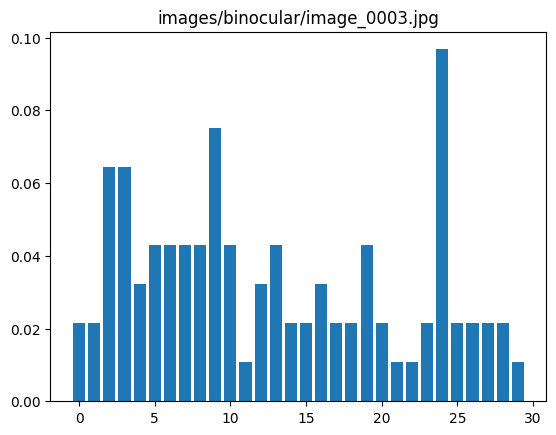

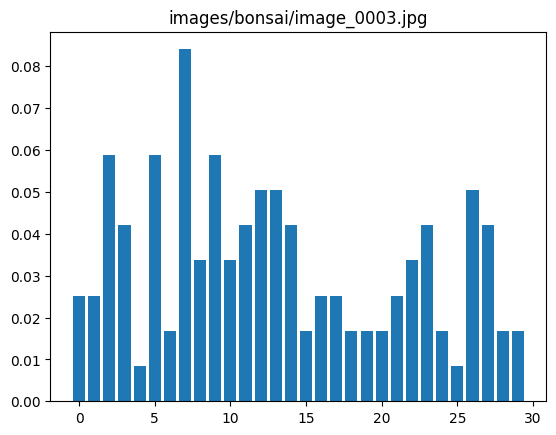

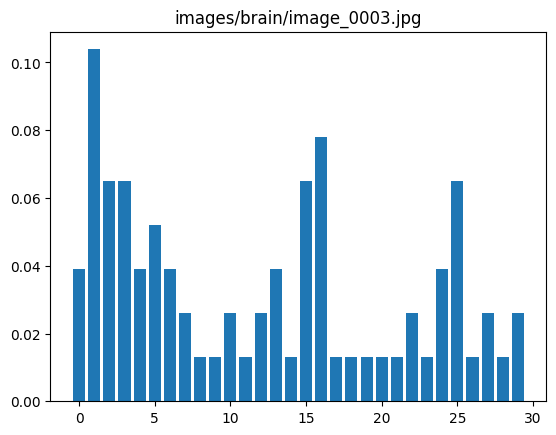

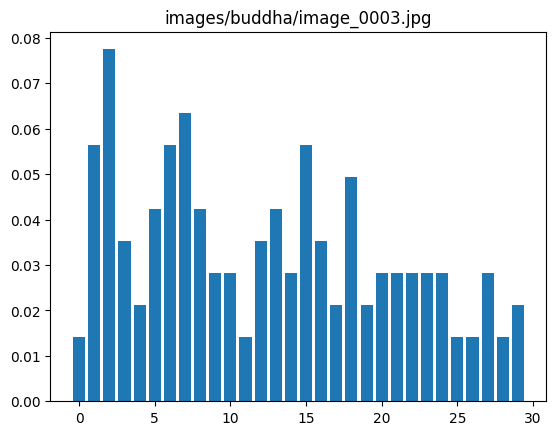

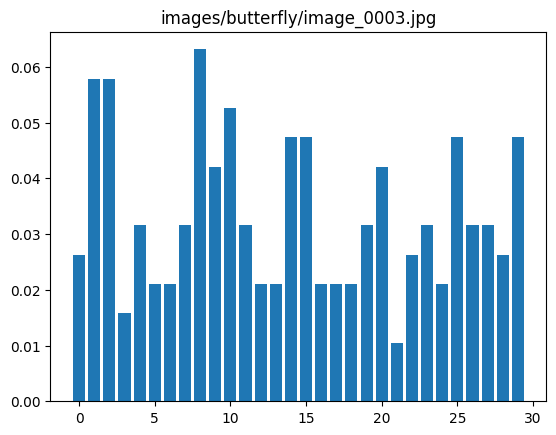

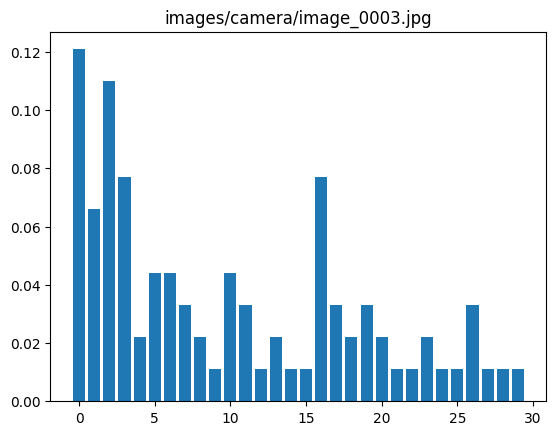

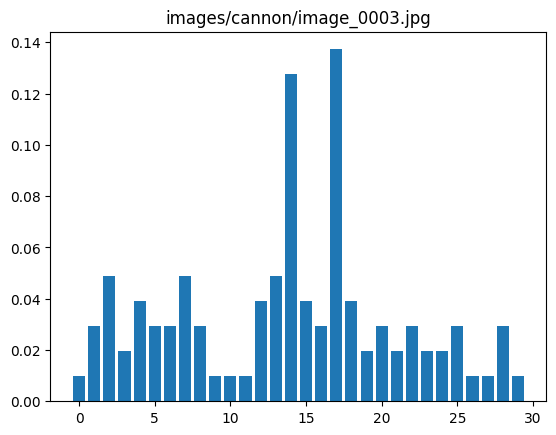

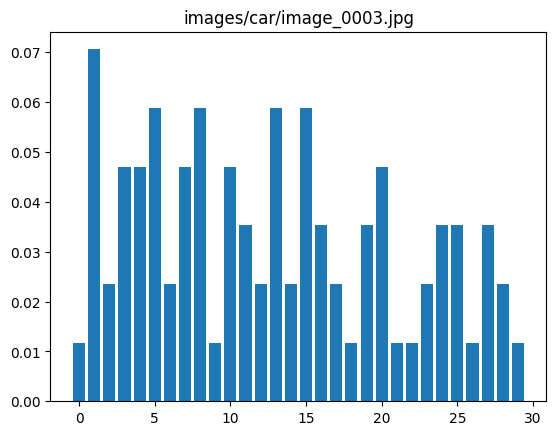

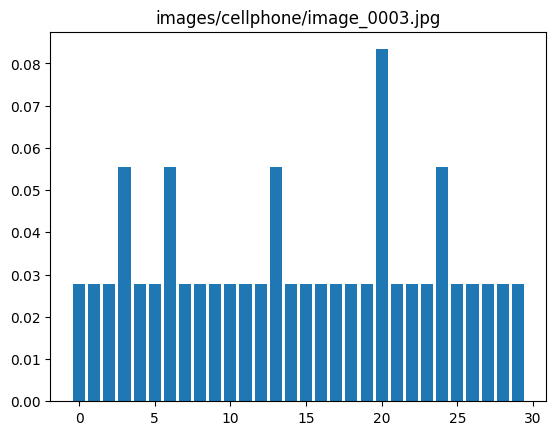

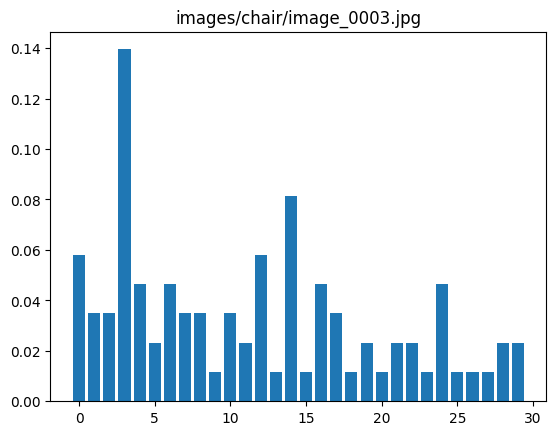

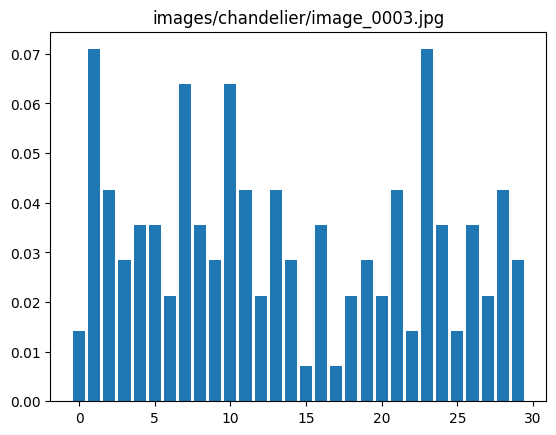

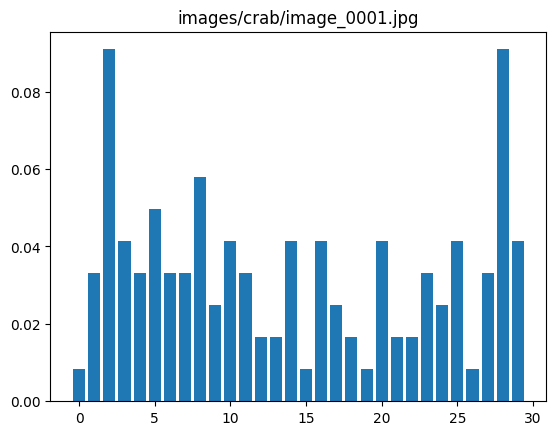

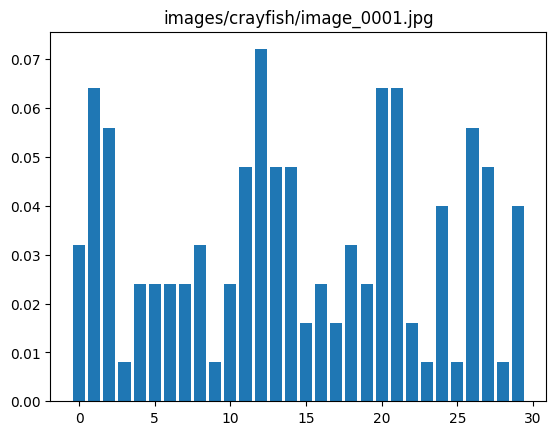

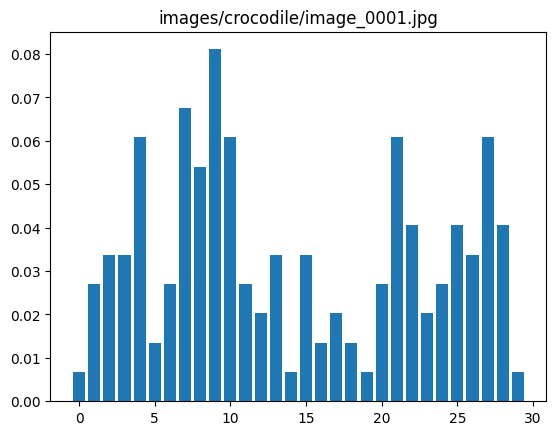

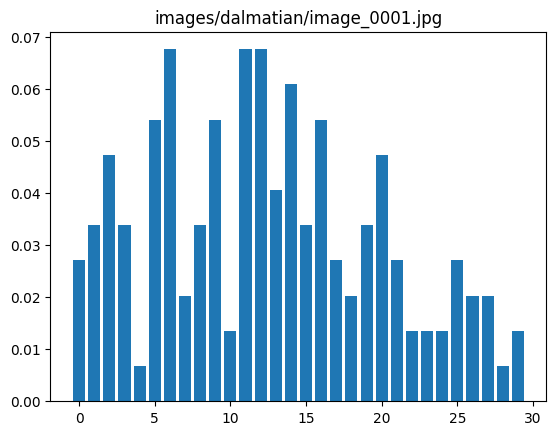

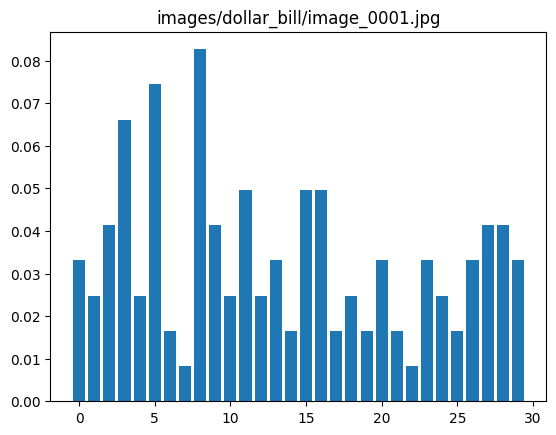

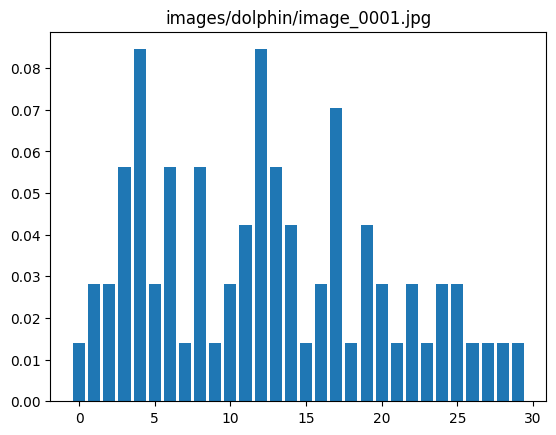

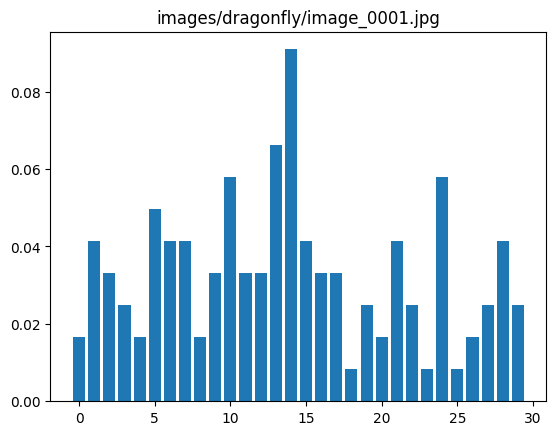

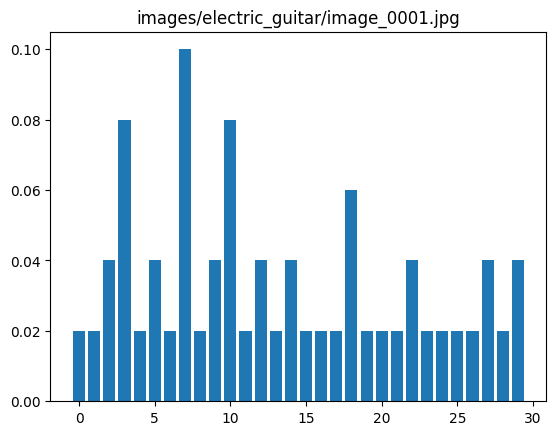

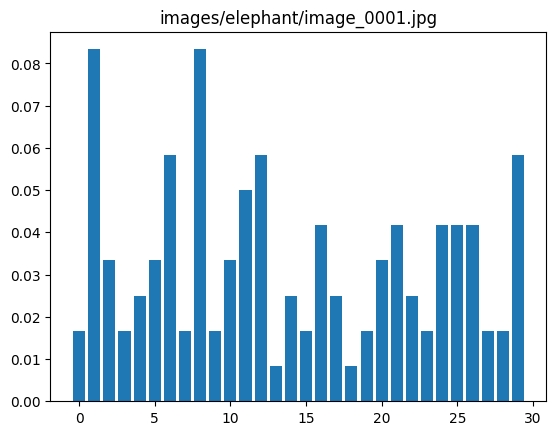

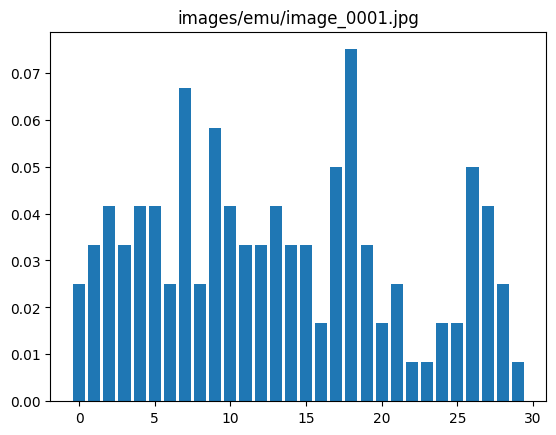

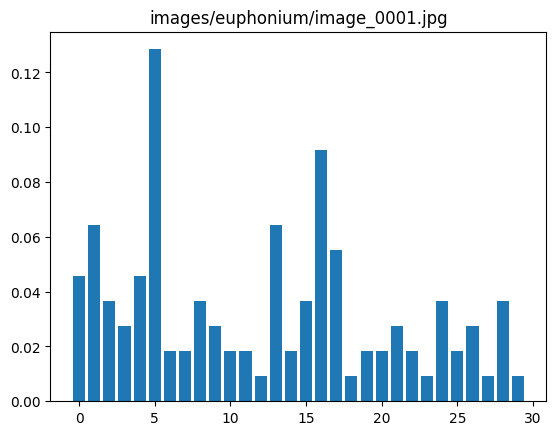

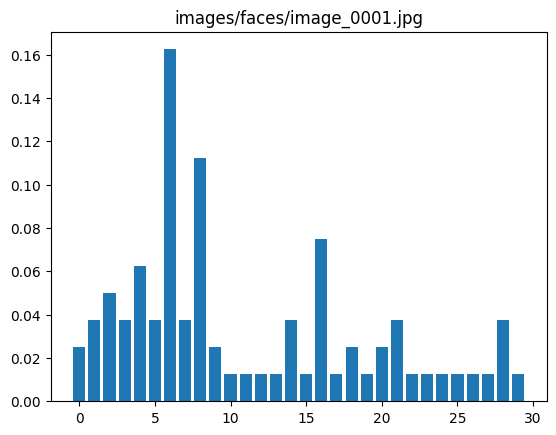

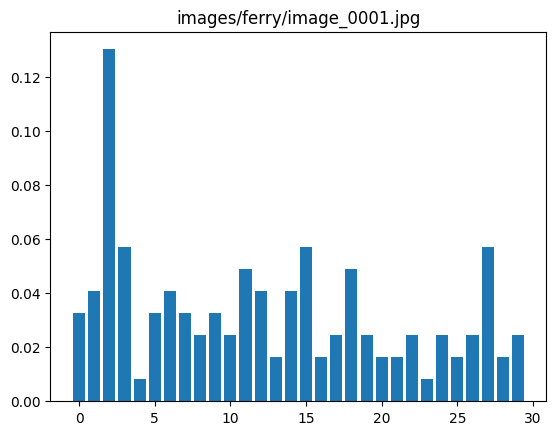

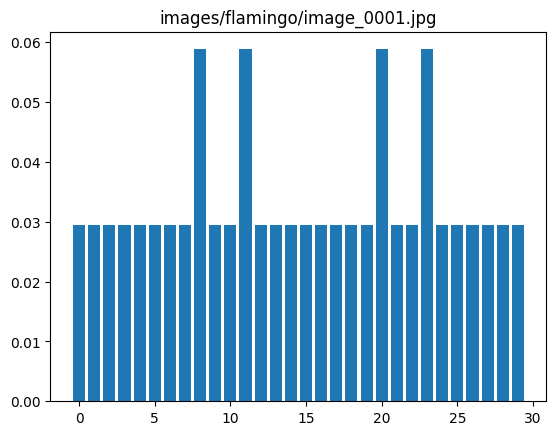

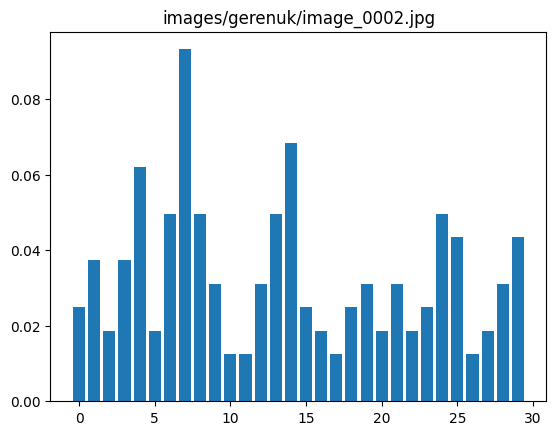

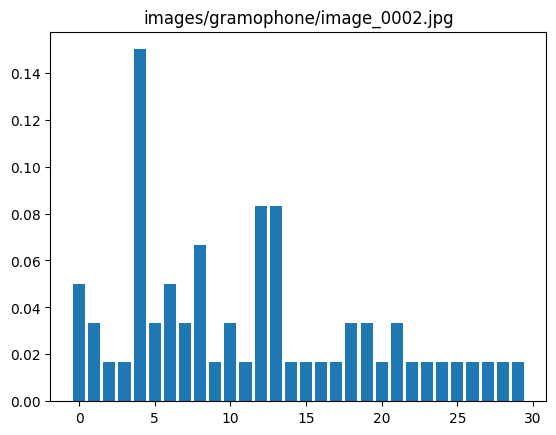

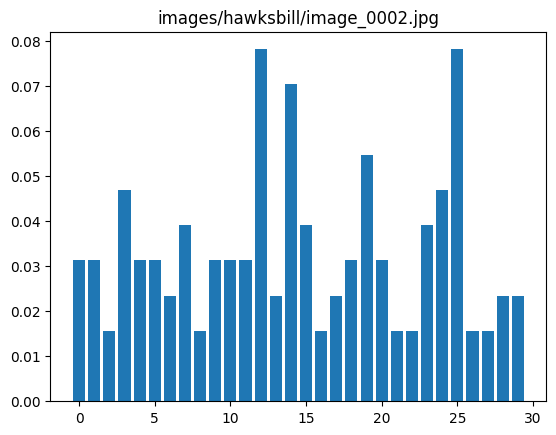

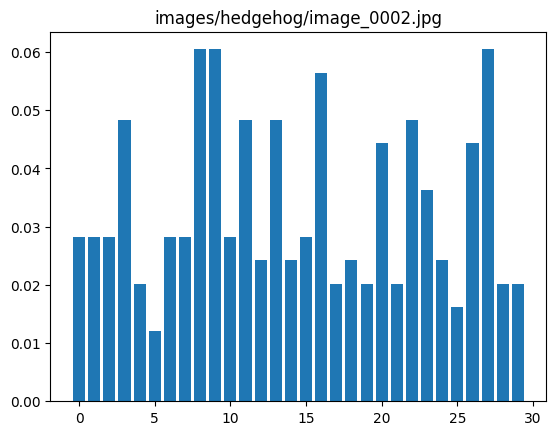

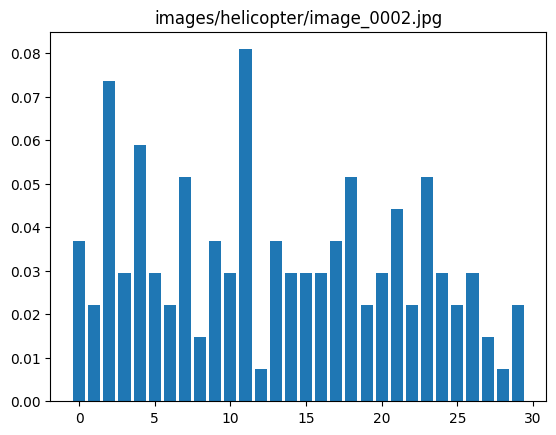

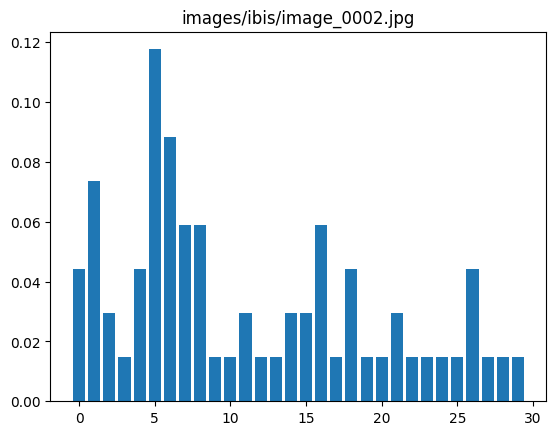

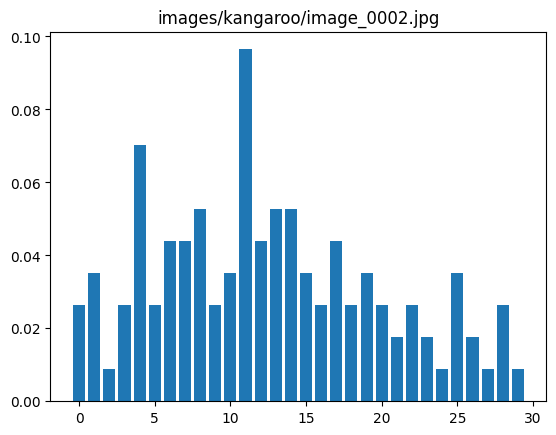

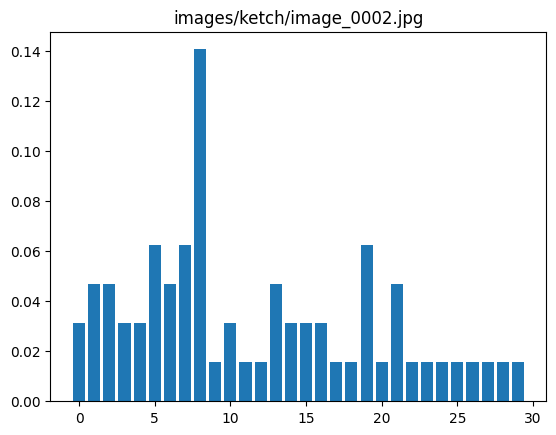

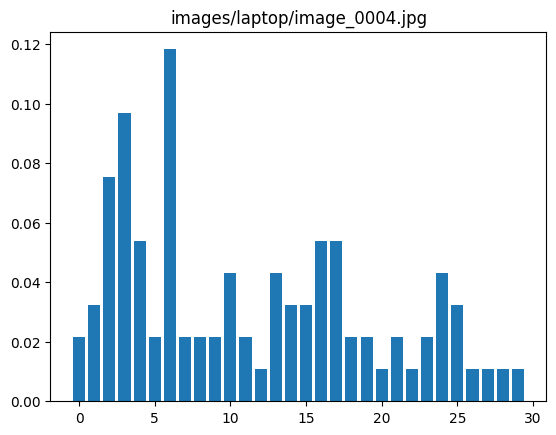

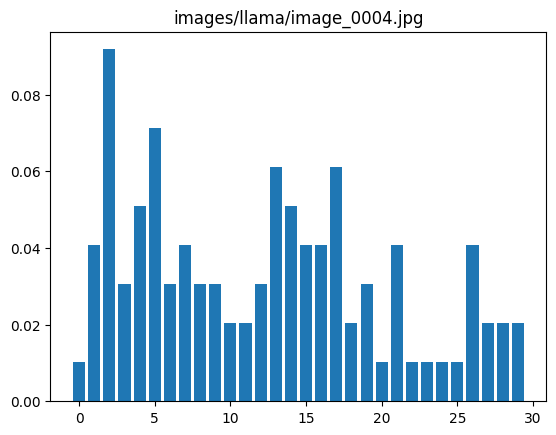

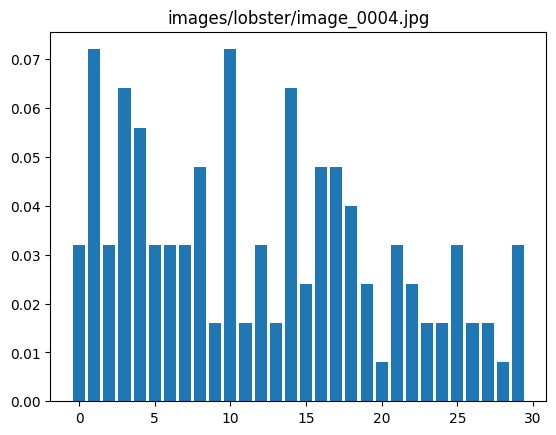

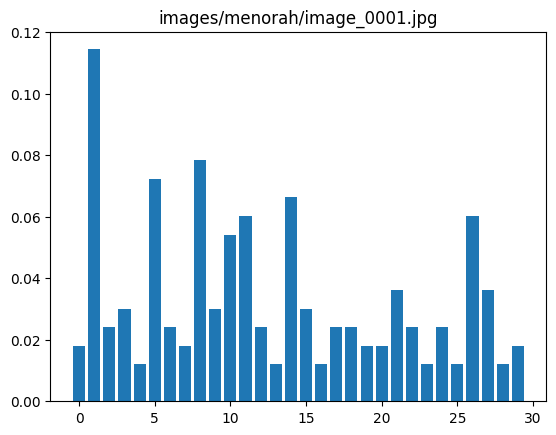

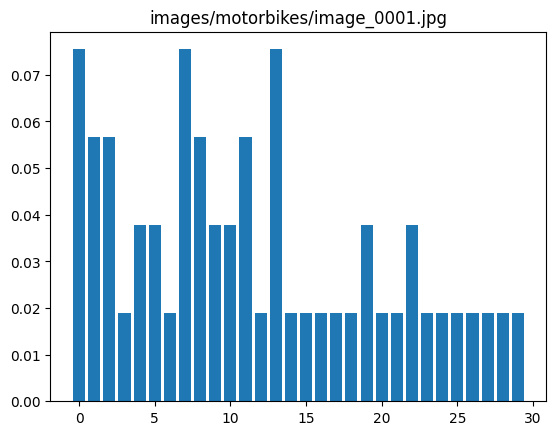

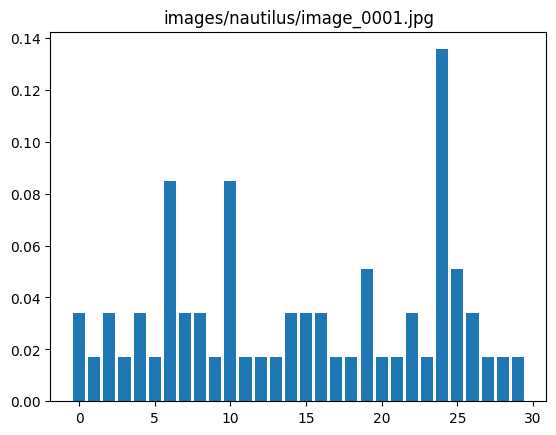

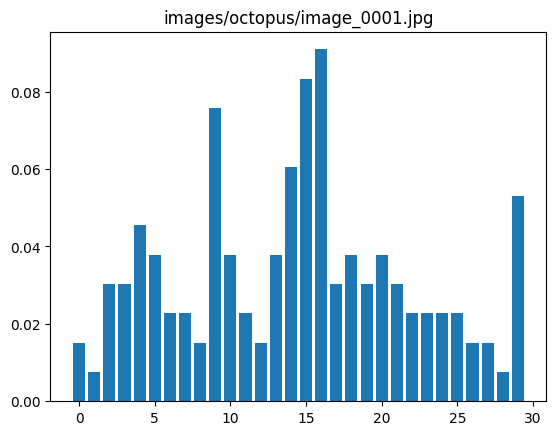

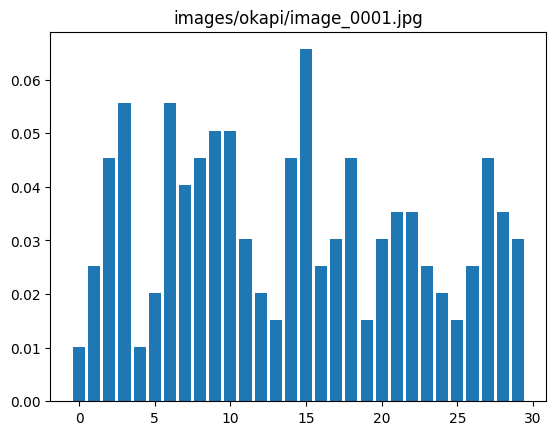

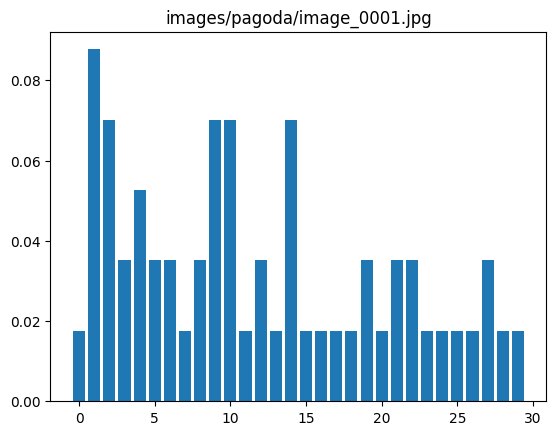

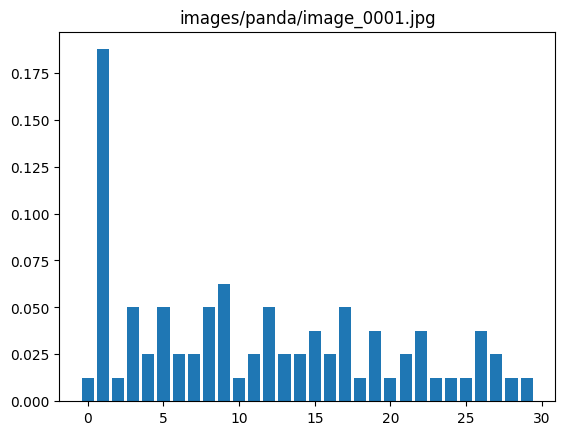

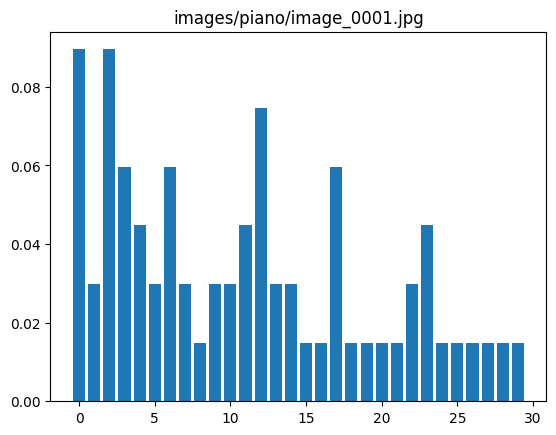

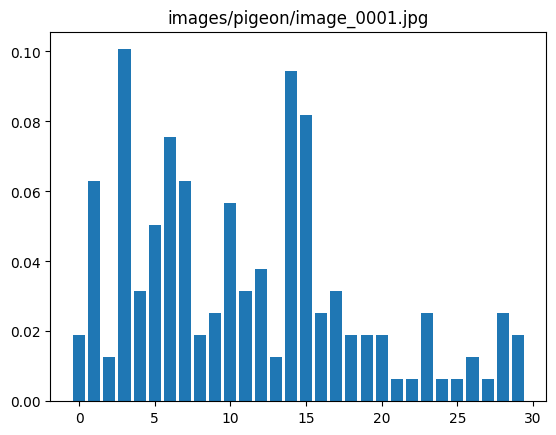

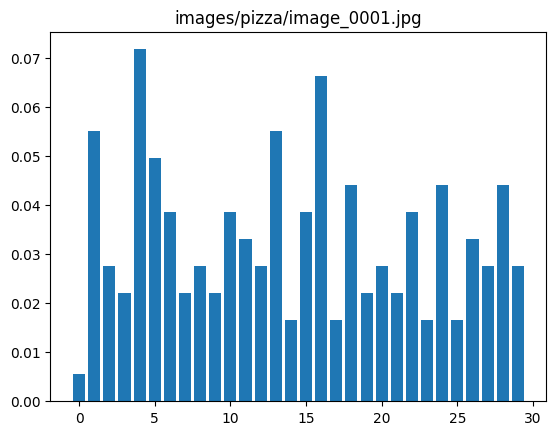

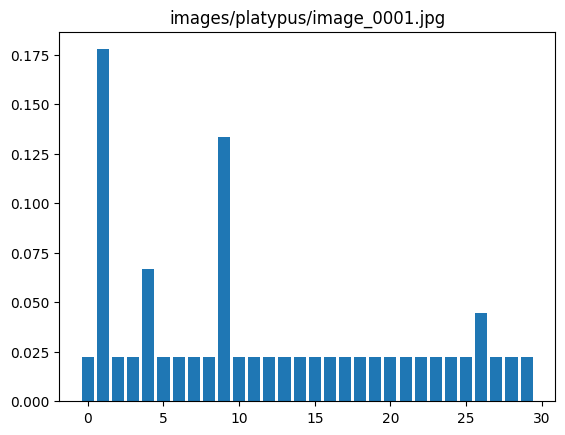

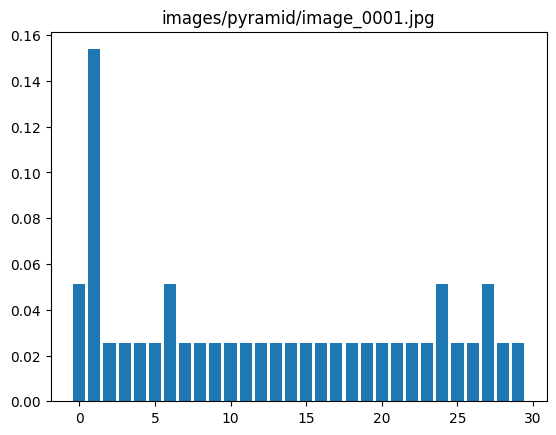

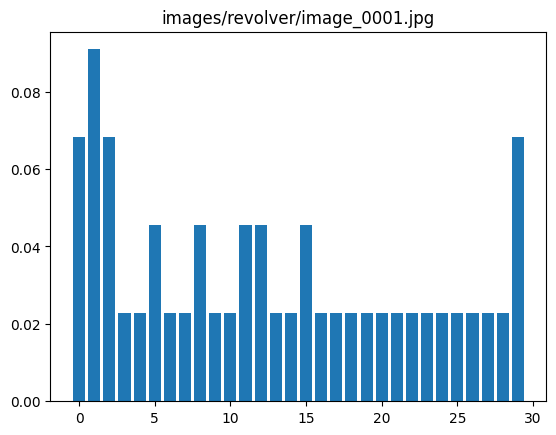

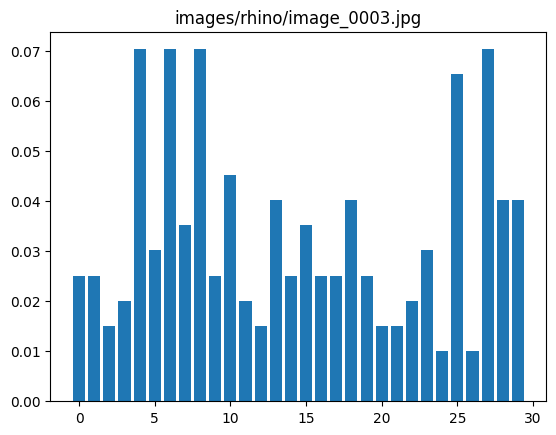

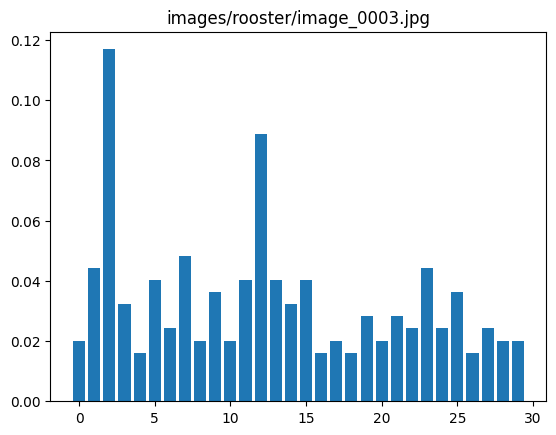

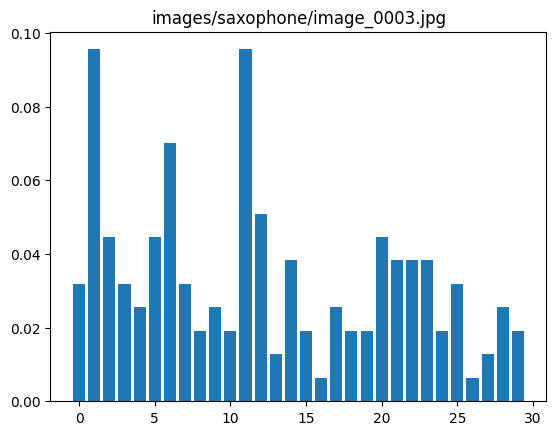

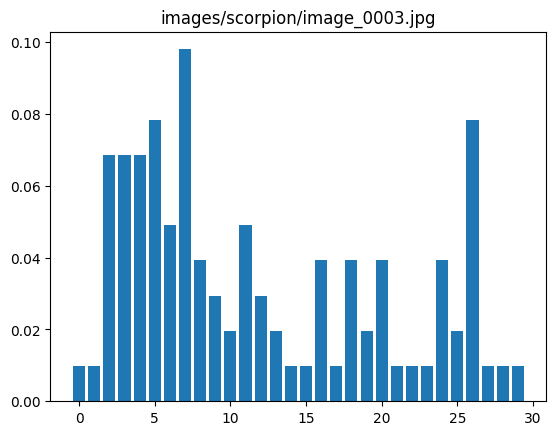

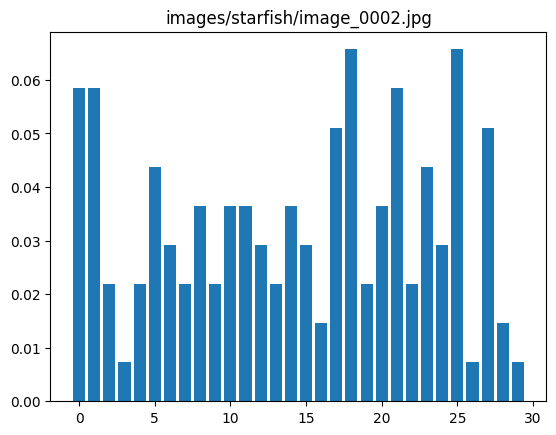

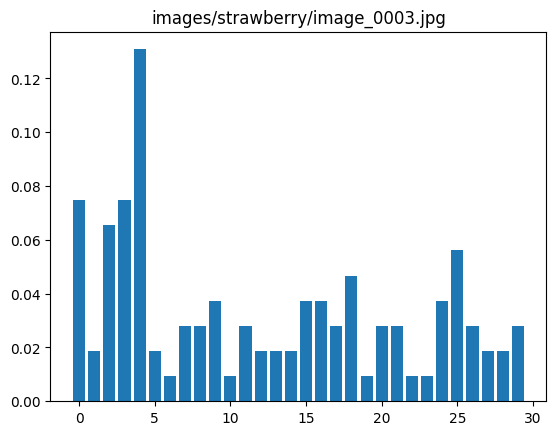

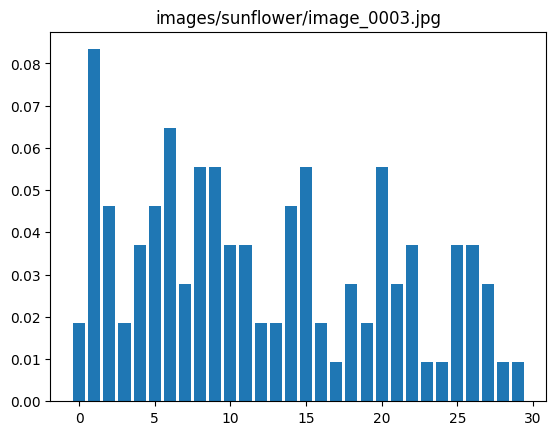

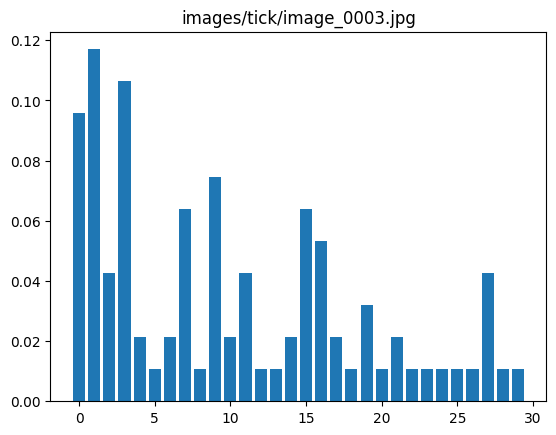

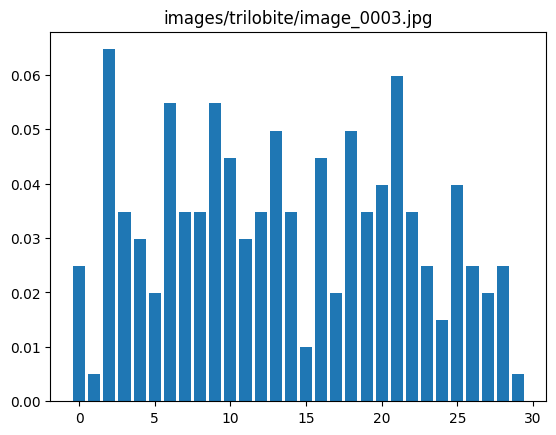

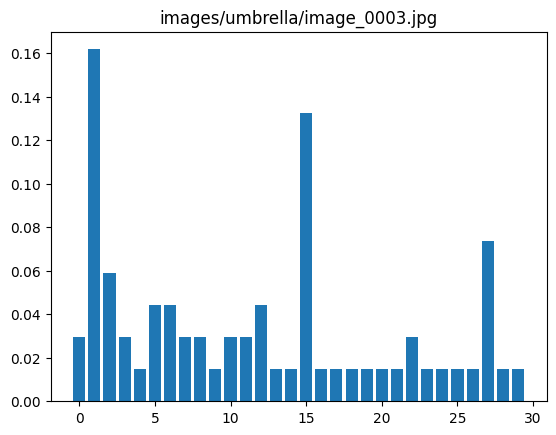

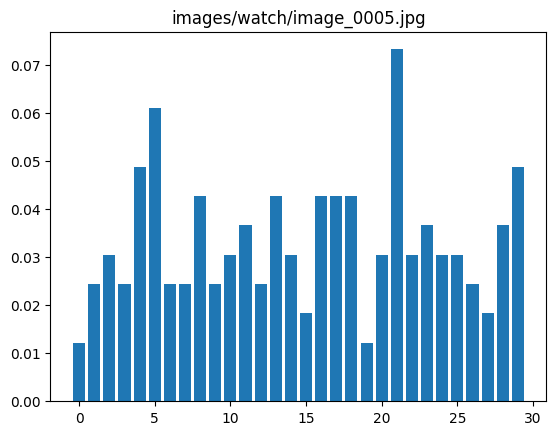

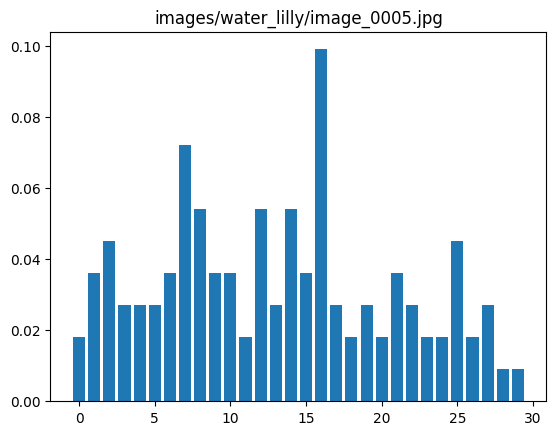

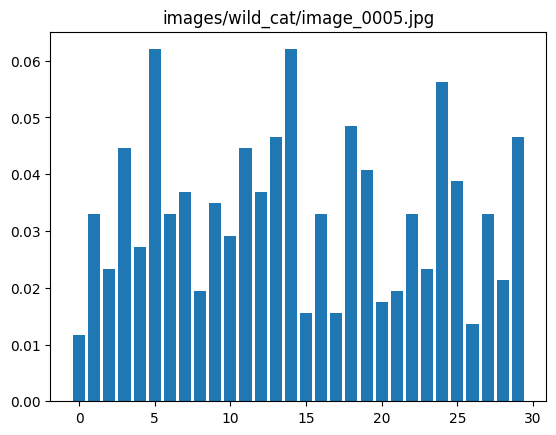

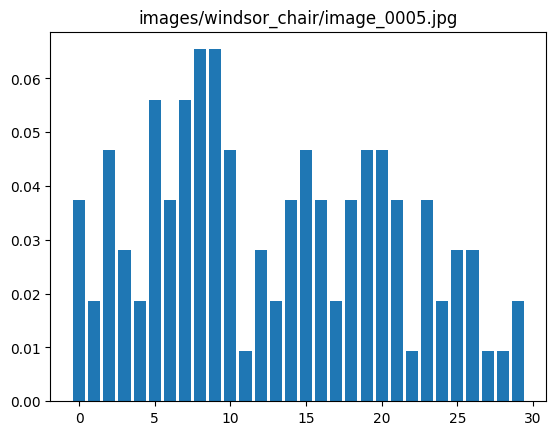

In [80]:
# Poizvedbe po dictionary-ju in risanje histogramov

print(len(dict_histograms_2))

for i, image in enumerate(dict_histograms_2):
    if i % 5 != 0:
        pass
    else:
        #Plot the histogram
        histogram = dict_histograms_2[image]
        plt.bar(range(len(histogram)), histogram)
        plt.title(image)

        # Show the plot
        plt.show()